<a href="https://colab.research.google.com/github/MimmoDG/NBA-Project---Programming/blob/main/Project_VR481299_Di_Grazia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [208]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as skm
import time
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error

# LeBron James analysis:


*   Record breaker
*   Career trends

His datasets are automatically updated using html



## Per Game LeBron

In [2]:
data = pd.read_html('https://www.basketball-reference.com/players/j/jamesle01.html')

In [3]:
LeBron_Career_PerGame_RS = pd.DataFrame(data[0])

In [4]:
for el in LeBron_Career_PerGame_RS:
  if(el != "Season" and el != "Pos"  and el != "Tm" and el != "Lg"):
    LeBron_Career_PerGame_RS[el] = pd.to_numeric(LeBron_Career_PerGame_RS[el])

In [5]:
LeBron_Career_PerGame_RS 

,Season,Age,Tm,Lg,Pos,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2003-04,19.0,CLE,NBA,SG,79.0,79.0,39.5,7.9,18.9,...,0.754,1.3,4.2,5.5,5.9,1.6,0.7,3.5,1.9,20.9
1,2004-05,20.0,CLE,NBA,SF,80.0,80.0,42.4,9.9,21.1,...,0.750,1.4,6.0,7.4,7.2,2.2,0.7,3.3,1.8,27.2
2,2005-06,21.0,CLE,NBA,SF,79.0,79.0,42.5,11.1,23.1,...,0.738,0.9,6.1,7.0,6.6,1.6,0.8,3.3,2.3,31.4
3,2006-07,22.0,CLE,NBA,SF,78.0,78.0,40.9,9.9,20.8,...,0.698,1.1,5.7,6.7,6.0,1.6,0.7,3.2,2.2,27.3
4,2007-08,23.0,CLE,NBA,SF,75.0,74.0,40.4,10.6,21.9,...,0.712,1.8,6.1,7.9,7.2,1.8,1.1,3.4,2.2,30.0
5,2008-09,24.0,CLE,NBA,SF,81.0,81.0,37.7,9.7,19.9,...,0.780,1.3,6.3,7.6,7.2,1.7,1.1,3.0,1.7,28.4
6,2009-10,25.0,CLE,NBA,SF,76.0,76.0,39.0,10.1,20.1,...,0.767,0.9,6.4,7.3,8.6,1.6,1.0,3.4,1.6,29.7
7,2010-11,26.0,MIA,NBA,SF,79.0,79.0,38.8,9.6,18.8,...,0.759,1.0,6.5,7.5,7.0,1.6,0.6,3.6,2.1,26.7
8,2011-12,27.0,MIA,NBA,SF,62.0,62.0,37.5,10.0,18.9,...,0.771,1.5,6.4,7.9,6.2,1.9,0.8,3.4,1.5,27.1
9,2012-13,28.0,MIA,NBA,PF,76.0,76.0,37.9,10.1,17.8,...,0.753,1.3,6.8,8.0,7.3,1.7,0.9,3.0,1.4,26.8


In [6]:
LeB_C_PG_RS1 = LeBron_Career_PerGame_RS.drop(labels=range(19, 24), axis=0)

In [7]:
LeB_C_PG_RS = LeB_C_PG_RS1.drop(labels=['Lg', 'Age', 'GS'], axis=1)

In [8]:
LeB_C_PG_RS

,Season,Tm,Pos,G,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2003-04,CLE,SG,79.0,39.5,7.9,18.9,0.417,0.8,2.7,...,0.754,1.3,4.2,5.5,5.9,1.6,0.7,3.5,1.9,20.9
1,2004-05,CLE,SF,80.0,42.4,9.9,21.1,0.472,1.4,3.9,...,0.750,1.4,6.0,7.4,7.2,2.2,0.7,3.3,1.8,27.2
2,2005-06,CLE,SF,79.0,42.5,11.1,23.1,0.480,1.6,4.8,...,0.738,0.9,6.1,7.0,6.6,1.6,0.8,3.3,2.3,31.4
3,2006-07,CLE,SF,78.0,40.9,9.9,20.8,0.476,1.3,4.0,...,0.698,1.1,5.7,6.7,6.0,1.6,0.7,3.2,2.2,27.3
4,2007-08,CLE,SF,75.0,40.4,10.6,21.9,0.484,1.5,4.8,...,0.712,1.8,6.1,7.9,7.2,1.8,1.1,3.4,2.2,30.0
5,2008-09,CLE,SF,81.0,37.7,9.7,19.9,0.489,1.6,4.7,...,0.780,1.3,6.3,7.6,7.2,1.7,1.1,3.0,1.7,28.4
6,2009-10,CLE,SF,76.0,39.0,10.1,20.1,0.503,1.7,5.1,...,0.767,0.9,6.4,7.3,8.6,1.6,1.0,3.4,1.6,29.7
7,2010-11,MIA,SF,79.0,38.8,9.6,18.8,0.510,1.2,3.5,...,0.759,1.0,6.5,7.5,7.0,1.6,0.6,3.6,2.1,26.7
8,2011-12,MIA,SF,62.0,37.5,10.0,18.9,0.531,0.9,2.4,...,0.771,1.5,6.4,7.9,6.2,1.9,0.8,3.4,1.5,27.1
9,2012-13,MIA,PF,76.0,37.9,10.1,17.8,0.565,1.4,3.3,...,0.753,1.3,6.8,8.0,7.3,1.7,0.9,3.0,1.4,26.8


In [9]:
LeB_C_PG_RS.to_csv('df_LBJ_xG_Stats_final.csv', index=False)

In [10]:
LeB_C_PG_RS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 0 to 18
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Season  19 non-null     object 
 1   Tm      19 non-null     object 
 2   Pos     19 non-null     object 
 3   G       19 non-null     float64
 4   MP      19 non-null     float64
 5   FG      19 non-null     float64
 6   FGA     19 non-null     float64
 7   FG%     19 non-null     float64
 8   3P      19 non-null     float64
 9   3PA     19 non-null     float64
 10  3P%     19 non-null     float64
 11  2P      19 non-null     float64
 12  2PA     19 non-null     float64
 13  2P%     19 non-null     float64
 14  eFG%    19 non-null     float64
 15  FT      19 non-null     float64
 16  FTA     19 non-null     float64
 17  FT%     19 non-null     float64
 18  ORB     19 non-null     float64
 19  DRB     19 non-null     float64
 20  TRB     19 non-null     float64
 21  AST     19 non-null     float64
 22  STL 

In [11]:
LeB_C_PG_RS.describe()

,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,...,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,71.894737,37.952632,9.921053,19.626316,0.506947,1.610526,4.626316,0.345684,8.321053,14.989474,...,0.731053,1.157895,6.363158,7.500000,7.368421,1.547368,0.752632,3.515789,1.842105,27.110526
std,10.332767,2.470800,0.745042,1.515418,0.036055,0.499883,1.353531,0.026967,0.672953,1.648870,...,0.033763,0.291196,0.801534,0.822598,1.164308,0.267433,0.219516,0.330426,0.263135,2.347551
min,45.000000,33.400000,7.900000,17.600000,0.417000,0.800000,2.400000,0.290000,7.100000,12.000000,...,0.665000,0.600000,4.200000,5.500000,5.900000,1.100000,0.300000,3.000000,1.400000,20.900000
25%,68.000000,36.500000,9.650000,18.550000,0.486000,1.350000,3.800000,0.331500,8.100000,13.700000,...,0.704000,1.000000,6.000000,7.150000,6.450000,1.350000,0.600000,3.300000,1.650000,25.850000
50%,76.000000,37.700000,9.900000,19.300000,0.510000,1.600000,4.700000,0.348000,8.500000,14.900000,...,0.738000,1.100000,6.400000,7.600000,7.200000,1.600000,0.700000,3.500000,1.800000,27.100000
75%,79.000000,39.250000,10.100000,20.450000,0.527500,1.750000,5.050000,0.362500,8.600000,16.300000,...,0.755000,1.300000,6.950000,7.950000,8.050000,1.650000,0.900000,3.650000,2.050000,27.950000
max,82.000000,42.500000,11.400000,23.100000,0.567000,2.900000,8.000000,0.406000,9.500000,18.300000,...,0.780000,1.800000,7.500000,8.600000,10.200000,2.200000,1.100000,4.200000,2.300000,31.400000


In [12]:
a = LeB_C_PG_RS['PTS'].head(7).mean() #media punti ai cavs (prima esperienza)
b = LeB_C_PG_RS['PTS'].iloc[7:11].mean() #media punti agli heat
c = LeB_C_PG_RS['PTS'].iloc[11:15].mean() #media punti ai cavs (seconda esperienza)
d = LeB_C_PG_RS['PTS'].tail(4).mean() #media punti ai lakers
[a, b, c, d]

[27.842857142857145, 26.924999999999997, 26.125, 27.0]

In [13]:
LeB_C_PG_RS.corr()

,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
G,1.000000,0.648481,-0.077635,0.084983,-0.163009,-0.597796,-0.567433,-0.231603,0.345488,0.540898,...,0.385871,0.399113,-0.398275,-0.291513,-0.111583,0.510551,0.105450,-0.214274,0.167228,0.058909
MP,0.648481,1.000000,0.214543,0.599188,-0.393790,-0.434083,-0.399955,-0.293063,0.575323,0.877108,...,0.347130,0.344543,-0.424520,-0.300400,-0.444719,0.706464,0.281411,-0.433860,0.448433,0.381008
FG,-0.077635,0.214543,1.000000,0.586997,0.447180,0.473729,0.451164,0.324972,0.764734,0.178369,...,0.043020,0.116984,0.594905,0.615501,0.034752,-0.008071,0.417460,-0.107490,0.238934,0.907674
FGA,0.084983,0.599188,0.586997,1.000000,-0.459361,0.236494,0.344434,-0.374311,0.488082,0.641110,...,0.050896,0.120992,-0.021569,0.036099,-0.166067,0.250355,0.528351,-0.278247,0.674168,0.684852
FG%,-0.163009,-0.393790,0.447180,-0.459361,1.000000,0.235532,0.088256,0.781696,0.317402,-0.490062,...,-0.018572,0.008244,0.666233,0.631072,0.210514,-0.252666,-0.142124,0.173081,-0.489886,0.247525
3P,-0.597796,-0.434083,0.473729,0.236494,0.235532,1.000000,0.975023,0.360453,-0.202176,-0.578167,...,-0.328874,-0.477674,0.616652,0.451251,0.426325,-0.598202,0.161744,0.342010,0.089362,0.356384
3PA,-0.567433,-0.399955,0.451164,0.344434,0.088256,0.975023,1.000000,0.157771,-0.211065,-0.499466,...,-0.368747,-0.453719,0.535554,0.383207,0.417595,-0.609870,0.191408,0.328197,0.219774,0.370047
3P%,-0.231603,-0.293063,0.324972,-0.374311,0.781696,0.360453,0.157771,1.000000,0.096512,-0.468733,...,0.044562,-0.199171,0.558969,0.463816,0.241718,-0.066370,-0.057099,0.130897,-0.575813,0.177147
2P,0.345488,0.575323,0.764734,0.488082,0.317402,-0.202176,-0.211065,0.096512,1.000000,0.628058,...,0.288718,0.492399,0.202360,0.352259,-0.290523,0.441757,0.341835,-0.381341,0.211194,0.747841
2PA,0.540898,0.877108,0.178369,0.641110,-0.490062,-0.578167,-0.499466,-0.468733,0.628058,1.000000,...,0.352878,0.480362,-0.454296,-0.277705,-0.495028,0.734438,0.331616,-0.530935,0.438993,0.335591


In [14]:
A = LeB_C_PG_RS.corr().min()
C = LeB_C_PG_RS.corr().max()
B = LeB_C_PG_RS.corr().mean()
[A, B, C]

[G      -0.597796
 MP     -0.561678
 FG     -0.107490
 FGA    -0.459361
 FG%    -0.490062
 3P     -0.598202
 3PA    -0.609870
 3P%    -0.575813
 2P     -0.381341
 2PA    -0.674583
 2P%    -0.674583
 eFG%   -0.646005
 FT     -0.526896
 FTA    -0.441808
 FT%    -0.521464
 ORB    -0.477674
 DRB    -0.470877
 TRB    -0.300400
 AST    -0.495028
 STL    -0.609870
 BLK    -0.333783
 TOV    -0.555896
 PF     -0.575813
 PTS    -0.260925
 dtype: float64,
 G       0.074019
 MP      0.147172
 FG      0.369173
 FGA     0.220788
 FG%     0.164209
 3P      0.122583
 3PA     0.111096
 3P%     0.131266
 2P      0.320760
 2PA     0.114907
 2P%     0.158042
 eFG%    0.159737
 FT      0.210006
 FTA     0.212377
 FT%     0.076684
 ORB     0.103332
 DRB     0.219618
 TRB     0.247401
 AST     0.049859
 STL     0.084824
 BLK     0.222665
 TOV    -0.048604
 PF      0.063592
 PTS     0.372640
 dtype: float64,
 G       1.0
 MP      1.0
 FG      1.0
 FGA     1.0
 FG%     1.0
 3P      1.0
 3PA     1.0
 3P%     1.

<AxesSubplot:>

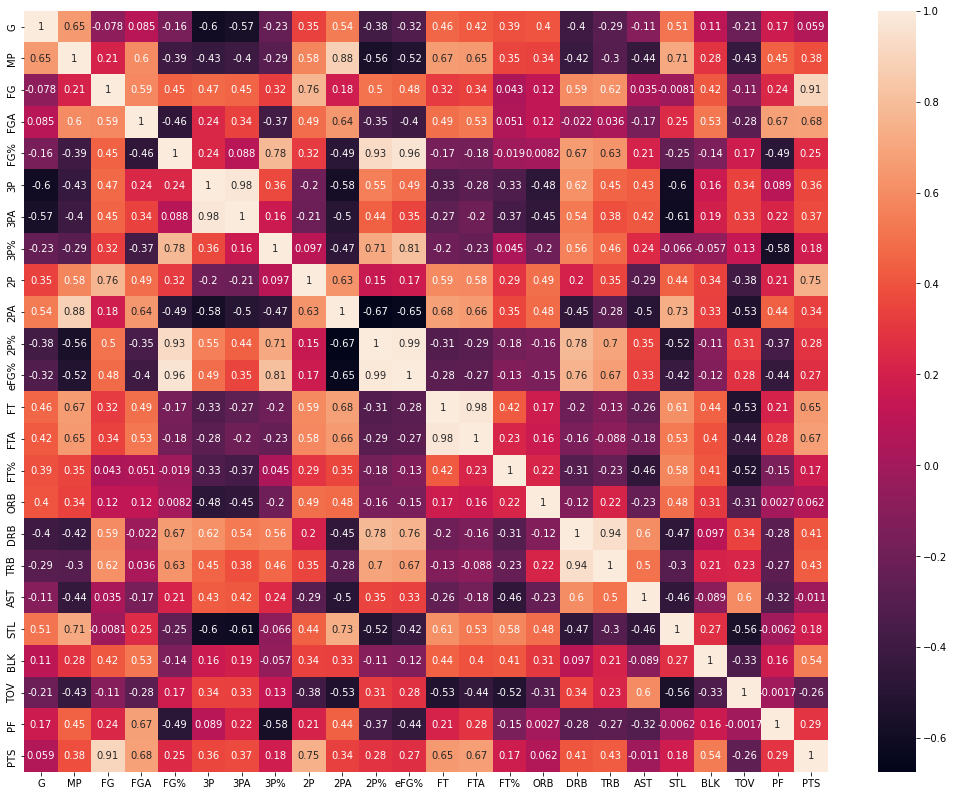

In [15]:
plt.figure(figsize=(18, 14))
sb.heatmap(LeB_C_PG_RS.corr(), annot=True)

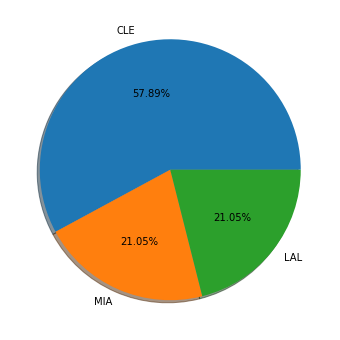

In [16]:
Team = list(LeB_C_PG_RS['Tm'])
CLE = Team.count('CLE')
MIA = Team.count('MIA')
LAL = Team.count('LAL')

Teams = ['CLE', 'MIA', 'LAL']
count = [CLE, MIA, LAL]
plt.figure(figsize=(10,6))
plt.pie(count, labels=Teams, autopct='%.2f%%', shadow=True)
plt.show()

array([[<AxesSubplot:title={'center':'G'}>,
        <AxesSubplot:title={'center':'MP'}>,
        <AxesSubplot:title={'center':'FG'}>,
        <AxesSubplot:title={'center':'FGA'}>,
        <AxesSubplot:title={'center':'FG%'}>],
       [<AxesSubplot:title={'center':'3P'}>,
        <AxesSubplot:title={'center':'3PA'}>,
        <AxesSubplot:title={'center':'3P%'}>,
        <AxesSubplot:title={'center':'2P'}>,
        <AxesSubplot:title={'center':'2PA'}>],
       [<AxesSubplot:title={'center':'2P%'}>,
        <AxesSubplot:title={'center':'eFG%'}>,
        <AxesSubplot:title={'center':'FT'}>,
        <AxesSubplot:title={'center':'FTA'}>,
        <AxesSubplot:title={'center':'FT%'}>],
       [<AxesSubplot:title={'center':'ORB'}>,
        <AxesSubplot:title={'center':'DRB'}>,
        <AxesSubplot:title={'center':'TRB'}>,
        <AxesSubplot:title={'center':'AST'}>,
        <AxesSubplot:title={'center':'STL'}>],
       [<AxesSubplot:title={'center':'BLK'}>,
        <AxesSubplot:title={'center'

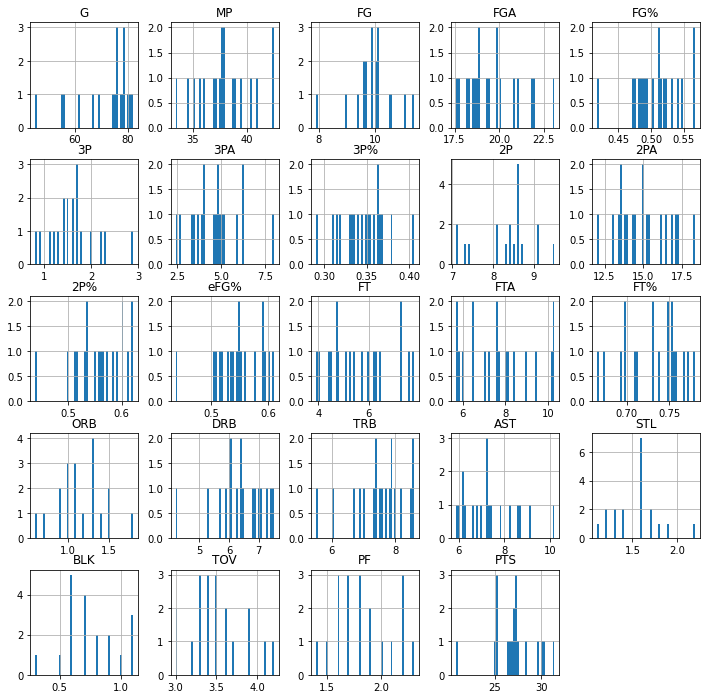

In [17]:
LeB_C_PG_RS.hist(bins=50, figsize=(12,12))

array([[<AxesSubplot:title={'center':'PTS'}>,
        <AxesSubplot:title={'center':'AST'}>],
       [<AxesSubplot:title={'center':'TRB'}>,
        <AxesSubplot:title={'center':'FG'}>],
       [<AxesSubplot:title={'center':'STL'}>,
        <AxesSubplot:title={'center':'TOV'}>]], dtype=object)

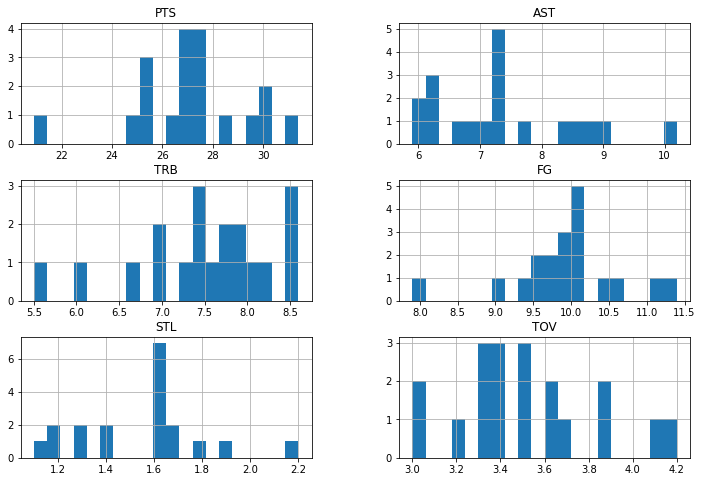

In [18]:
LeB_C_PG_RS[['PTS', 'AST', 'TRB', 'FG', 'STL', 'TOV']].hist(bins=20, figsize=(12, 8))

In [19]:
#mean games played, mean minutes played
#potrebbe non significare un cazzo
LeB_C_PG_RS['G'].mean() * LeB_C_PG_RS['MP'].mean() / (36 * 82)
#percentuale di gioco effettiva di LBJ durante la sua carriera

0.9243206164748629

In [20]:
#mean canestri fatti
LeB_C_PG_RS['FG'].mean() / LeB_C_PG_RS['FGA'].mean()

0.5054974524001072

In [21]:
LeB_C_PG_RS['FG%'].mean()

0.5069473684210527

In [22]:
#trovo le diverse squadre in cui ha giocato
LeB_C_PG_RS['Tm'].value_counts()

CLE    11
LAL     4
MIA     4
Name: Tm, dtype: int64

In [23]:
a1 = LeB_C_PG_RS['3PA'].mean()
TPA = list(LeB_C_PG_RS['3PA'])

a2 = LeB_C_PG_RS['2PA'].mean()
DPA = list(LeB_C_PG_RS['2PA'])

a = max(TPA)
TPA.index(a)

b = min(TPA)
TPA.index(b)

c = max(DPA)
DPA.index(c)

d = min(DPA)
DPA.index(d)

(a, b, c, d)

(8.0, 2.4, 18.3, 12.0)

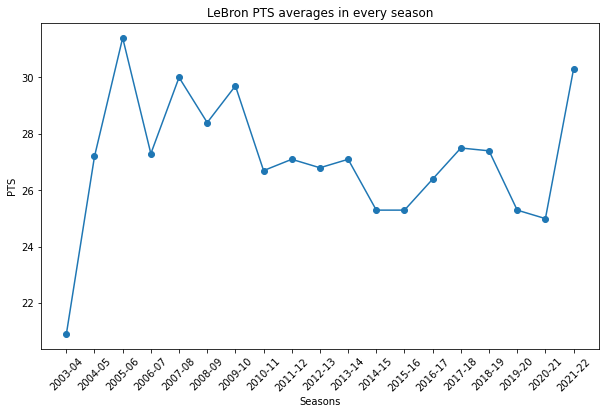

In [24]:
Season = list(LeB_C_PG_RS['Season'])
PTS = list(LeB_C_PG_RS['PTS'])

plt.figure(figsize=(10, 6))
plt.plot(Season, PTS, '-o')
plt.title('LeBron PTS averages in every season')
plt.xlabel('Seasons')
plt.ylabel('PTS')
plt.xticks(rotation=45)
plt.show()

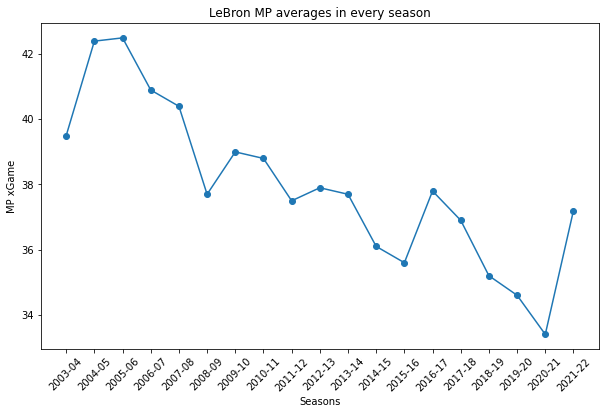

In [25]:
Season = list(LeB_C_PG_RS['Season'])
MP = list(LeB_C_PG_RS['MP'])

plt.figure(figsize=(10, 6))
plt.plot(Season, MP, '-o')
plt.title('LeBron MP averages in every season')
plt.xlabel('Seasons')
plt.ylabel('MP xGame')
plt.xticks(rotation=45)
plt.show()

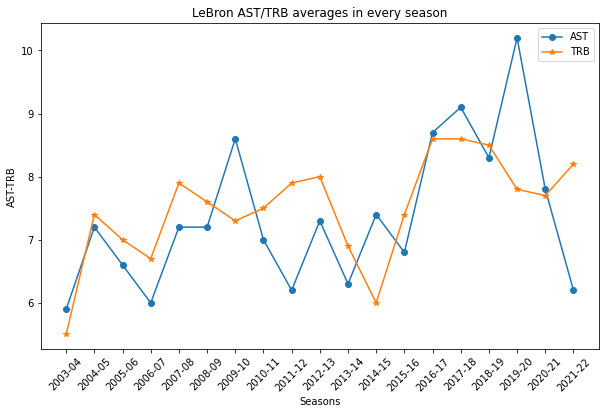

In [26]:
Season = list(LeB_C_PG_RS['Season'])
AST = list(LeB_C_PG_RS['AST'])
TRB = list(LeB_C_PG_RS['TRB'])

plt.figure(figsize=(10, 6))
plt.plot(Season, AST, '-o', label='AST')
plt.plot(Season, TRB, '-*', label='TRB')
plt.title('LeBron AST/TRB averages in every season')
plt.xlabel('Seasons')
plt.ylabel('AST-TRB')
plt.xticks(rotation=45)
plt.legend()
plt.show()

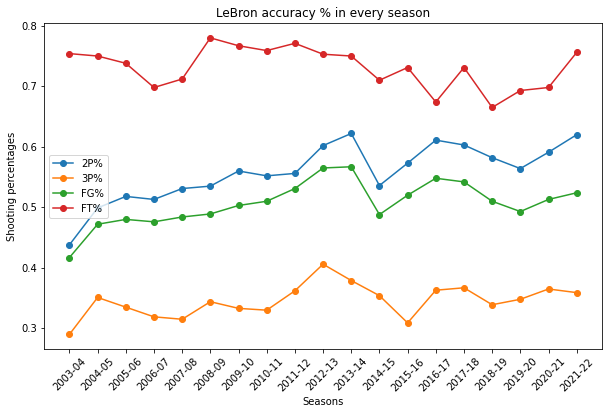

In [27]:
Season = list(LeB_C_PG_RS['Season'])
DPP = list(LeB_C_PG_RS['2P%'])
TPP = list(LeB_C_PG_RS['3P%'])
FGP = list(LeB_C_PG_RS['FG%'])
FTP = list(LeB_C_PG_RS['FT%'])

plt.figure(figsize=(10, 6))
plt.plot(Season, DPP, '-o', label='2P%')
plt.plot(Season, TPP, '-o', label='3P%')
plt.plot(Season, FGP, '-o', label='FG%')
plt.plot(Season, FTP, '-o', label='FT%')
plt.title('LeBron accuracy % in every season')
plt.xlabel('Seasons')
plt.ylabel('Shooting percentages')
plt.legend()
plt.xticks(rotation=45)
plt.show()

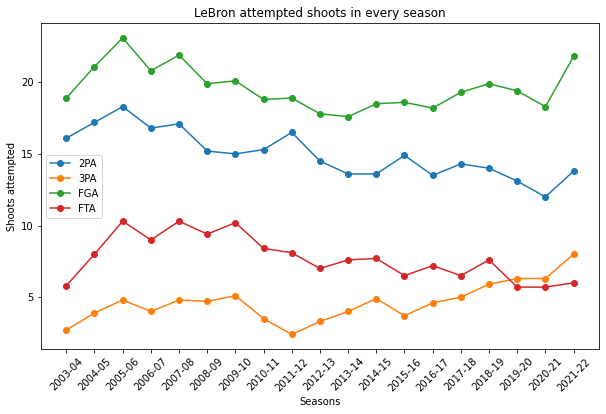

In [28]:
Season = list(LeB_C_PG_RS['Season'])
DPA = list(LeB_C_PG_RS['2PA'])
TPA = list(LeB_C_PG_RS['3PA'])
FGA = list(LeB_C_PG_RS['FGA'])
FTA = list(LeB_C_PG_RS['FTA'])

plt.figure(figsize=(10, 6))
plt.plot(Season, DPA, '-o', label='2PA')
plt.plot(Season, TPA, '-o', label='3PA')
plt.plot(Season, FGA, '-o', label='FGA')
plt.plot(Season, FTA, '-o', label='FTA')
plt.title('LeBron attempted shoots in every season')
plt.xlabel('Seasons')
plt.ylabel('Shoots attempted')
plt.legend()
plt.xticks(rotation=45)
plt.show()

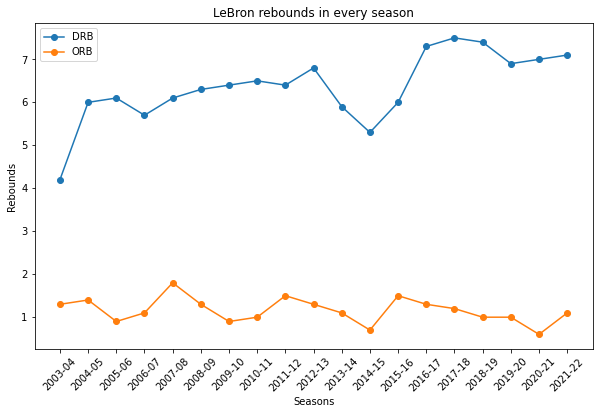

In [29]:
Season = list(LeB_C_PG_RS['Season'])
DRB = list(LeB_C_PG_RS['DRB'])
ORB = list(LeB_C_PG_RS['ORB'])

plt.figure(figsize=(10, 6))
plt.plot(Season, DRB, '-o', label='DRB')
plt.plot(Season, ORB, '-o', label='ORB')
plt.title('LeBron rebounds in every season')
plt.xlabel('Seasons')
plt.ylabel('Rebounds')
plt.legend()
plt.xticks(rotation=45)
plt.show()

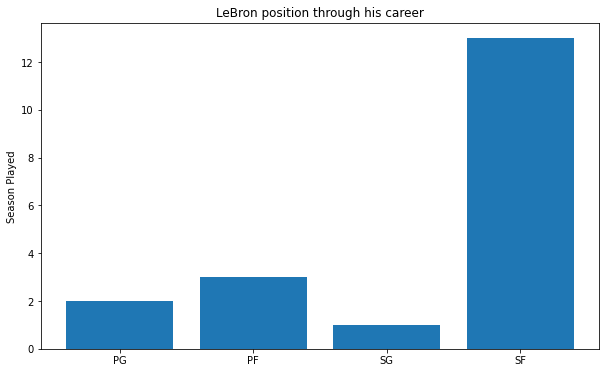

In [30]:
Season = list(LeB_C_PG_RS['Season'])
Position = list(LeB_C_PG_RS['Pos'])
PG = Position.count('PG')
PF = Position.count('PF')
SG = Position.count('SG')
SF = Position.count('SF')

x = ['PG', 'PF', 'SG', 'SF'] 
y = [PG, PF, SG, SF]

plt.figure(figsize=(10, 6))
plt.title('LeBron position through his career')
plt.bar(x, y)  #LeB_C_PG_RS['Pos'].value_counts()
plt.ylabel('Season Played')
plt.show()

Il ruolo di centro non è inserito, in quanto ha cominciato a giocarci da metà stagione quest'anno

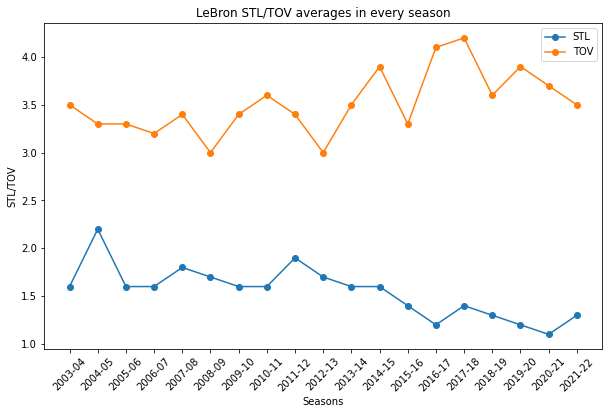

In [31]:
Season = list(LeB_C_PG_RS['Season'])
STL = list(LeB_C_PG_RS['STL'])
TOV = list(LeB_C_PG_RS['TOV'])

plt.figure(figsize=(10, 6))
plt.plot(Season, STL, '-o', label='STL')
plt.plot(Season, TOV, '-o', label='TOV')
plt.title('LeBron STL/TOV averages in every season')
plt.xlabel('Seasons')
plt.ylabel('STL/TOV')
plt.legend()
plt.xticks(rotation=45)
plt.show()

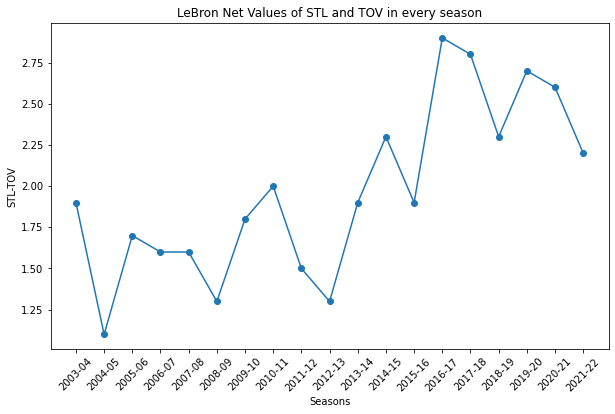

In [32]:
#NET VALUE OF STEELS AND TURNOVERS
#it is obviously negative and means that he gets more turnovers than steels.
#STL - TOV
STL_array = np.array(STL)
TOV_array = np.array(TOV)

plt.figure(figsize=(10, 6))
plt.plot(Season, TOV_array-STL_array, '-o')
plt.title('LeBron Net Values of STL and TOV in every season')
plt.xlabel('Seasons')
plt.ylabel('STL-TOV')
plt.xticks(rotation=45)
plt.show()

In [33]:
a = LeB_C_PG_RS['PTS'].max() 
b = LeB_C_PG_RS['AST'].max()
c = LeB_C_PG_RS['TRB'].max()
d = LeB_C_PG_RS['STL'].max()
e = LeB_C_PG_RS['TOV'].max()
[a, b, c, d, e]

[31.4, 10.2, 8.6, 2.2, 4.2]

In [34]:
a = LeB_C_PG_RS['PTS'].min() 
b = LeB_C_PG_RS['AST'].min()
c = LeB_C_PG_RS['TRB'].min()
d = LeB_C_PG_RS['STL'].min()
e = LeB_C_PG_RS['TOV'].min()
[a, b, c, d, e]

[20.9, 5.9, 5.5, 1.1, 3.0]

In [35]:
a = LeB_C_PG_RS['PTS'].mean() 
b = LeB_C_PG_RS['AST'].mean()
c = LeB_C_PG_RS['TRB'].mean()
d = LeB_C_PG_RS['STL'].mean()
e = LeB_C_PG_RS['TOV'].mean()
[a, b, c, d, e]

[27.110526315789475,
 7.368421052631579,
 7.5,
 1.5473684210526317,
 3.5157894736842112]

In [36]:
LBJ_Stats = LeB_C_PG_RS.sort_values(by='Season')[['Season', 'PTS', 'AST', 'TRB', 'STL', 'TOV', 'FG', '3P', '2P', 'FT']]
LBJ_Stats.set_index('Season', inplace=True)
LBJ_Stats

,PTS,AST,TRB,STL,TOV,FG,3P,2P,FT
Season,,,,,,,,,
2003-04,20.9,5.9,5.5,1.6,3.5,7.9,0.8,7.1,4.4
2004-05,27.2,7.2,7.4,2.2,3.3,9.9,1.4,8.6,6.0
2005-06,31.4,6.6,7.0,1.6,3.3,11.1,1.6,9.5,7.6
2006-07,27.3,6.0,6.7,1.6,3.2,9.9,1.3,8.6,6.3
2007-08,30.0,7.2,7.9,1.8,3.4,10.6,1.5,9.1,7.3
2008-09,28.4,7.2,7.6,1.7,3.0,9.7,1.6,8.1,7.3
2009-10,29.7,8.6,7.3,1.6,3.4,10.1,1.7,8.4,7.8
2010-11,26.7,7.0,7.5,1.6,3.6,9.6,1.2,8.4,6.4
2011-12,27.1,6.2,7.9,1.9,3.4,10.0,0.9,9.1,6.2


In [37]:
x = 'PTS'
ms = LBJ_Stats[x].max()
a = str(LBJ_Stats[LBJ_Stats[x]==ms].index)[8:15]

In [38]:
ms1 = LBJ_Stats['AST'].max()
b = str(LBJ_Stats[LBJ_Stats['AST']==ms1].index)[8:15]

In [39]:
ms2 = LBJ_Stats['TRB'].max()
c = str(LBJ_Stats[LBJ_Stats['TRB']==ms2].index)[8:23]

In [40]:
ms3 = LBJ_Stats['STL'].max()
d = LBJ_Stats[LBJ_Stats['STL']==ms3].index

In [41]:
[ms, ms1, ms2, ms3]
a

'2005-06'

In [42]:
LBJ_Stats['PTS'].max() #index del max da trovare e da fare per altre stats

31.4

In [242]:
LeB_C_PG_RS.columns.drop(['Season', 'Tm', 'Pos']).tolist()

['G',
 'MP',
 'FG',
 'FGA',
 'FG%',
 '3P',
 '3PA',
 '3P%',
 '2P',
 '2PA',
 '2P%',
 'eFG%',
 'FT',
 'FTA',
 'FT%',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS']

## Totals LeBron

In [43]:
LeBron_Career_Totals_RS = pd.DataFrame(data[2])

In [44]:
for el in LeBron_Career_Totals_RS:
  if(el != "Season" and el != "Pos"  and el != "Tm" and el != "Lg"):
    LeBron_Career_Totals_RS[el] = pd.to_numeric(LeBron_Career_Totals_RS[el])

In [45]:
LeBron_Career_Totals_RS

,Season,Age,Tm,Lg,Pos,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Unnamed: 30,Trp Dbl
0,2003-04,19.0,CLE,NBA,SG,79.0,79.0,3122.0,622.0,1492.0,...,333.0,432.0,465.0,130.0,58.0,273.0,149.0,1654.0,NaN,0.0
1,2004-05,20.0,CLE,NBA,SF,80.0,80.0,3388.0,795.0,1684.0,...,477.0,588.0,577.0,177.0,52.0,262.0,146.0,2175.0,NaN,4.0
2,2005-06,21.0,CLE,NBA,SF,79.0,79.0,3361.0,875.0,1823.0,...,481.0,556.0,521.0,123.0,66.0,260.0,181.0,2478.0,NaN,5.0
3,2006-07,22.0,CLE,NBA,SF,78.0,78.0,3190.0,772.0,1621.0,...,443.0,526.0,470.0,125.0,55.0,250.0,171.0,2132.0,NaN,1.0
4,2007-08,23.0,CLE,NBA,SF,75.0,74.0,3027.0,794.0,1642.0,...,459.0,592.0,539.0,138.0,81.0,255.0,165.0,2250.0,NaN,7.0
5,2008-09,24.0,CLE,NBA,SF,81.0,81.0,3054.0,789.0,1613.0,...,507.0,613.0,587.0,137.0,93.0,241.0,139.0,2304.0,NaN,7.0
6,2009-10,25.0,CLE,NBA,SF,76.0,76.0,2966.0,768.0,1528.0,...,483.0,554.0,651.0,125.0,77.0,261.0,119.0,2258.0,NaN,4.0
7,2010-11,26.0,MIA,NBA,SF,79.0,79.0,3063.0,758.0,1485.0,...,510.0,590.0,554.0,124.0,50.0,284.0,163.0,2111.0,NaN,4.0
8,2011-12,27.0,MIA,NBA,SF,62.0,62.0,2326.0,621.0,1169.0,...,398.0,492.0,387.0,115.0,50.0,213.0,96.0,1683.0,NaN,0.0
9,2012-13,28.0,MIA,NBA,PF,76.0,76.0,2877.0,765.0,1354.0,...,513.0,610.0,551.0,129.0,67.0,226.0,110.0,2036.0,NaN,4.0


In [46]:
LeB_C_Tot_RS1 = LeBron_Career_Totals_RS.drop(labels=range(19, 24), axis=0)

In [47]:
LeB_C_Tot_RS = LeB_C_Tot_RS1.drop(labels=['Lg', 'Age', 'GS', 'Unnamed: 30', 'Trp Dbl'], axis=1)

In [48]:
LeB_C_Tot_RS

,Season,Tm,Pos,G,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2003-04,CLE,SG,79.0,3122.0,622.0,1492.0,0.417,63.0,217.0,...,0.754,99.0,333.0,432.0,465.0,130.0,58.0,273.0,149.0,1654.0
1,2004-05,CLE,SF,80.0,3388.0,795.0,1684.0,0.472,108.0,308.0,...,0.750,111.0,477.0,588.0,577.0,177.0,52.0,262.0,146.0,2175.0
2,2005-06,CLE,SF,79.0,3361.0,875.0,1823.0,0.480,127.0,379.0,...,0.738,75.0,481.0,556.0,521.0,123.0,66.0,260.0,181.0,2478.0
3,2006-07,CLE,SF,78.0,3190.0,772.0,1621.0,0.476,99.0,310.0,...,0.698,83.0,443.0,526.0,470.0,125.0,55.0,250.0,171.0,2132.0
4,2007-08,CLE,SF,75.0,3027.0,794.0,1642.0,0.484,113.0,359.0,...,0.712,133.0,459.0,592.0,539.0,138.0,81.0,255.0,165.0,2250.0
5,2008-09,CLE,SF,81.0,3054.0,789.0,1613.0,0.489,132.0,384.0,...,0.780,106.0,507.0,613.0,587.0,137.0,93.0,241.0,139.0,2304.0
6,2009-10,CLE,SF,76.0,2966.0,768.0,1528.0,0.503,129.0,387.0,...,0.767,71.0,483.0,554.0,651.0,125.0,77.0,261.0,119.0,2258.0
7,2010-11,MIA,SF,79.0,3063.0,758.0,1485.0,0.510,92.0,279.0,...,0.759,80.0,510.0,590.0,554.0,124.0,50.0,284.0,163.0,2111.0
8,2011-12,MIA,SF,62.0,2326.0,621.0,1169.0,0.531,54.0,149.0,...,0.771,94.0,398.0,492.0,387.0,115.0,50.0,213.0,96.0,1683.0
9,2012-13,MIA,PF,76.0,2877.0,765.0,1354.0,0.565,103.0,254.0,...,0.753,97.0,513.0,610.0,551.0,129.0,67.0,226.0,110.0,2036.0


In [49]:
LeB_C_Tot_RS.to_csv('df_LBJ_Tot_Stats_final.csv', index=False)

In [50]:
LeB_C_Tot_RS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 0 to 18
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Season  19 non-null     object 
 1   Tm      19 non-null     object 
 2   Pos     19 non-null     object 
 3   G       19 non-null     float64
 4   MP      19 non-null     float64
 5   FG      19 non-null     float64
 6   FGA     19 non-null     float64
 7   FG%     19 non-null     float64
 8   3P      19 non-null     float64
 9   3PA     19 non-null     float64
 10  3P%     19 non-null     float64
 11  2P      19 non-null     float64
 12  2PA     19 non-null     float64
 13  2P%     19 non-null     float64
 14  eFG%    19 non-null     float64
 15  FT      19 non-null     float64
 16  FTA     19 non-null     float64
 17  FT%     19 non-null     float64
 18  ORB     19 non-null     float64
 19  DRB     19 non-null     float64
 20  TRB     19 non-null     float64
 21  AST     19 non-null     float64
 22  STL 

In [51]:
LeB_C_Tot_RS.describe()

,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,...,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,71.894737,2744.157895,712.789474,1411.842105,0.506947,112.631579,325.578947,0.345684,600.157895,1086.263158,...,0.731053,84.263158,453.105263,537.368421,528.684211,112.421053,54.789474,252.000000,132.421053,1950.631579
std,10.332767,507.483909,111.777845,237.731236,0.036055,27.201329,73.669921,0.026967,108.481060,231.234091,...,0.033763,24.785395,72.395438,87.139869,107.263462,29.524596,18.237869,40.618824,28.129296,335.339332
min,45.000000,1504.000000,422.000000,823.000000,0.417000,54.000000,149.000000,0.290000,318.000000,538.000000,...,0.665000,29.000000,317.000000,346.000000,349.000000,48.000000,25.000000,168.000000,70.000000,1126.000000
25%,68.000000,2409.500000,632.000000,1291.000000,0.486000,101.000000,283.500000,0.331500,531.500000,971.000000,...,0.704000,68.500000,403.000000,478.500000,467.500000,98.000000,46.500000,233.500000,118.500000,1696.500000
50%,76.000000,2902.000000,758.000000,1416.000000,0.510000,113.000000,327.000000,0.348000,650.000000,1134.000000,...,0.738000,83.000000,459.000000,554.000000,521.000000,121.000000,52.000000,260.000000,135.000000,2036.000000
75%,79.000000,3058.500000,780.500000,1596.500000,0.527500,128.000000,381.500000,0.362500,669.500000,1252.000000,...,0.755000,98.000000,495.000000,591.000000,582.000000,127.000000,66.500000,271.000000,147.500000,2212.500000
max,82.000000,3388.000000,875.000000,1823.000000,0.567000,161.000000,448.000000,0.406000,748.000000,1444.000000,...,0.780000,133.000000,612.000000,709.000000,747.000000,177.000000,93.000000,347.000000,181.000000,2478.000000


In [52]:
New_LeB_C_Tot_RS = LeB_C_Tot_RS.drop(['ORB', 'DRB', 'PF', 'FG%', '2P%', '3P%', 'FT%', 'Tm', 'Season'], axis=1)
New_LeB_C_Tot_RS

,Pos,G,MP,FG,FGA,3P,3PA,2P,2PA,eFG%,FT,FTA,TRB,AST,STL,BLK,TOV,PTS
0,SG,79.0,3122.0,622.0,1492.0,63.0,217.0,559.0,1275.0,0.438,347.0,460.0,432.0,465.0,130.0,58.0,273.0,1654.0
1,SF,80.0,3388.0,795.0,1684.0,108.0,308.0,687.0,1376.0,0.504,477.0,636.0,588.0,577.0,177.0,52.0,262.0,2175.0
2,SF,79.0,3361.0,875.0,1823.0,127.0,379.0,748.0,1444.0,0.515,601.0,814.0,556.0,521.0,123.0,66.0,260.0,2478.0
3,SF,78.0,3190.0,772.0,1621.0,99.0,310.0,673.0,1311.0,0.507,489.0,701.0,526.0,470.0,125.0,55.0,250.0,2132.0
4,SF,75.0,3027.0,794.0,1642.0,113.0,359.0,681.0,1283.0,0.518,549.0,771.0,592.0,539.0,138.0,81.0,255.0,2250.0
5,SF,81.0,3054.0,789.0,1613.0,132.0,384.0,657.0,1229.0,0.530,594.0,762.0,613.0,587.0,137.0,93.0,241.0,2304.0
6,SF,76.0,2966.0,768.0,1528.0,129.0,387.0,639.0,1141.0,0.545,593.0,773.0,554.0,651.0,125.0,77.0,261.0,2258.0
7,SF,79.0,3063.0,758.0,1485.0,92.0,279.0,666.0,1206.0,0.541,503.0,663.0,590.0,554.0,124.0,50.0,284.0,2111.0
8,SF,62.0,2326.0,621.0,1169.0,54.0,149.0,567.0,1020.0,0.554,387.0,502.0,492.0,387.0,115.0,50.0,213.0,1683.0
9,PF,76.0,2877.0,765.0,1354.0,103.0,254.0,662.0,1100.0,0.603,403.0,535.0,610.0,551.0,129.0,67.0,226.0,2036.0


In [53]:
New_LeB_C_Tot_RS.describe()

,G,MP,FG,FGA,3P,3PA,2P,2PA,eFG%,FT,FTA,TRB,AST,STL,BLK,TOV,PTS
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,71.894737,2744.157895,712.789474,1411.842105,112.631579,325.578947,600.157895,1086.263158,0.547947,412.421053,561.736842,537.368421,528.684211,112.421053,54.789474,252.000000,1950.631579
std,10.332767,507.483909,111.777845,237.731236,27.201329,73.669921,108.481060,231.234091,0.041997,122.863210,157.921514,87.139869,107.263462,29.524596,18.237869,40.618824,335.339332
min,45.000000,1504.000000,422.000000,823.000000,54.000000,149.000000,318.000000,538.000000,0.438000,178.000000,255.000000,346.000000,349.000000,48.000000,25.000000,168.000000,1126.000000
25%,68.000000,2409.500000,632.000000,1291.000000,101.000000,283.500000,531.500000,971.000000,0.524000,352.500000,475.500000,478.500000,467.500000,98.000000,46.500000,233.500000,1696.500000
50%,76.000000,2902.000000,758.000000,1416.000000,113.000000,327.000000,650.000000,1134.000000,0.550000,388.000000,531.000000,554.000000,521.000000,121.000000,52.000000,260.000000,2036.000000
75%,79.000000,3058.500000,780.500000,1596.500000,128.000000,381.500000,669.500000,1252.000000,0.583000,496.000000,682.000000,591.000000,582.000000,127.000000,66.500000,271.000000,2212.500000
max,82.000000,3388.000000,875.000000,1823.000000,161.000000,448.000000,748.000000,1444.000000,0.610000,601.000000,814.000000,709.000000,747.000000,177.000000,93.000000,347.000000,2478.000000


array([[<AxesSubplot:title={'center':'PTS'}>,
        <AxesSubplot:title={'center':'AST'}>],
       [<AxesSubplot:title={'center':'TRB'}>,
        <AxesSubplot:title={'center':'FG'}>],
       [<AxesSubplot:title={'center':'STL'}>,
        <AxesSubplot:title={'center':'TOV'}>]], dtype=object)

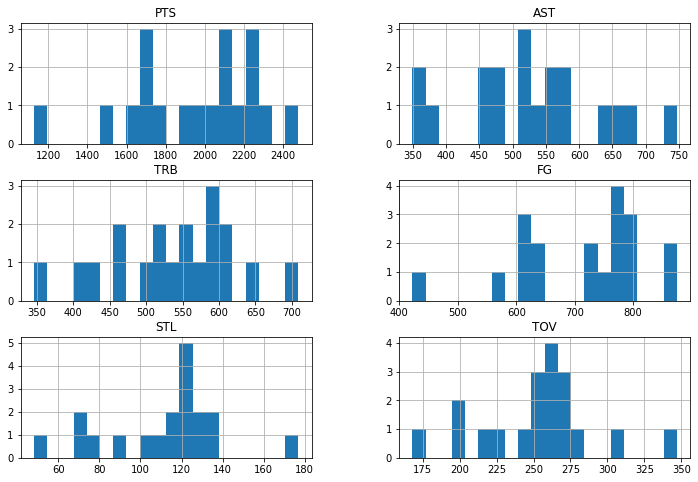

In [54]:
New_LeB_C_Tot_RS[['PTS', 'AST', 'TRB', 'FG', 'STL', 'TOV']].hist(bins=20, figsize=(12, 8))

In [55]:
New_LeB_C_Tot_RS.corr()

,G,MP,FG,FGA,3P,3PA,2P,2PA,eFG%,FT,FTA,TRB,AST,STL,BLK,TOV,PTS
G,1.000000,0.958686,0.876671,0.884206,-0.026237,0.039787,0.909892,0.896374,-0.322765,0.745027,0.740999,0.730465,0.634808,0.820000,0.544383,0.774486,0.855275
MP,0.958686,1.000000,0.880413,0.943678,-0.069250,0.012881,0.924533,0.966089,-0.434293,0.814171,0.815319,0.656055,0.504641,0.884661,0.562101,0.673330,0.879614
FG,0.876671,0.880413,1.000000,0.899677,0.241088,0.279842,0.969938,0.835799,-0.057566,0.795942,0.802487,0.851379,0.608661,0.721164,0.609849,0.661547,0.977832
FGA,0.884206,0.943678,0.899677,1.000000,0.116547,0.241931,0.897795,0.951020,-0.475488,0.833000,0.843483,0.647333,0.513277,0.802848,0.668100,0.606957,0.914427
3P,-0.026237,-0.069250,0.241088,0.116547,1.000000,0.960619,-0.002333,-0.186227,0.414814,-0.002395,0.016336,0.266527,0.422340,-0.237553,0.189763,0.181517,0.240961
3PA,0.039787,0.012881,0.279842,0.241931,0.960619,1.000000,0.047474,-0.069866,0.206852,0.096219,0.125584,0.250215,0.431303,-0.188464,0.275107,0.207267,0.299733
2P,0.909892,0.924533,0.969938,0.897795,-0.002333,0.047474,1.000000,0.907896,-0.163329,0.820732,0.822779,0.810422,0.521258,0.802646,0.580800,0.636137,0.947129
2PA,0.896374,0.966089,0.835799,0.951020,-0.186227,-0.069866,0.907896,1.000000,-0.554750,0.825751,0.827173,0.585804,0.390288,0.885450,0.599224,0.557977,0.844627
eFG%,-0.322765,-0.434293,-0.057566,-0.475488,0.414814,0.206852,-0.163329,-0.554750,1.000000,-0.332725,-0.338060,0.201121,0.062980,-0.461161,-0.288118,-0.094511,-0.126634
FT,0.745027,0.814171,0.795942,0.833000,-0.002395,0.096219,0.820732,0.825751,-0.332725,1.000000,0.989611,0.541256,0.367185,0.777285,0.689936,0.380886,0.896810


<AxesSubplot:>

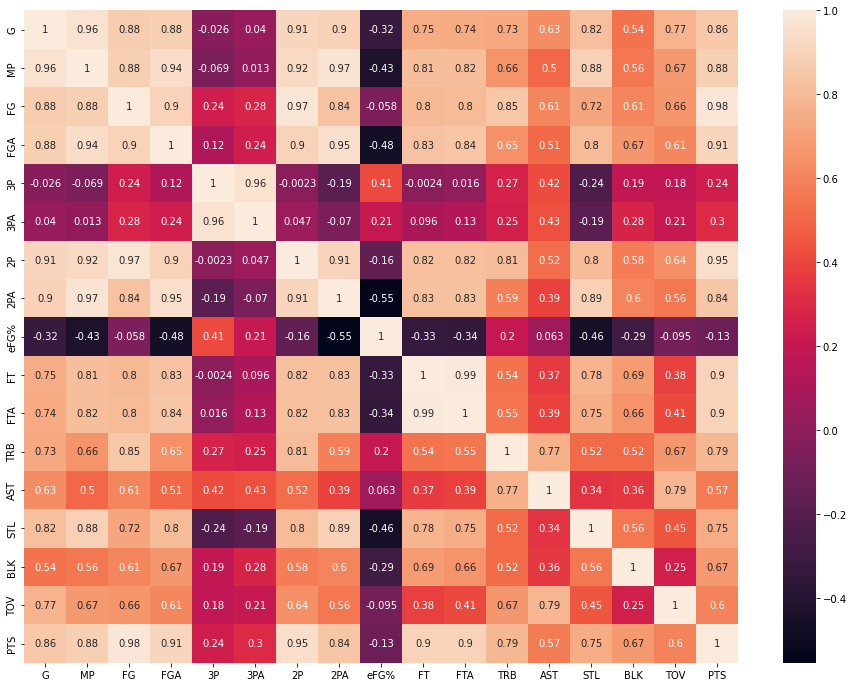

In [56]:
plt.figure(figsize=(16, 12))
sb.heatmap(New_LeB_C_Tot_RS.corr(), annot=True)

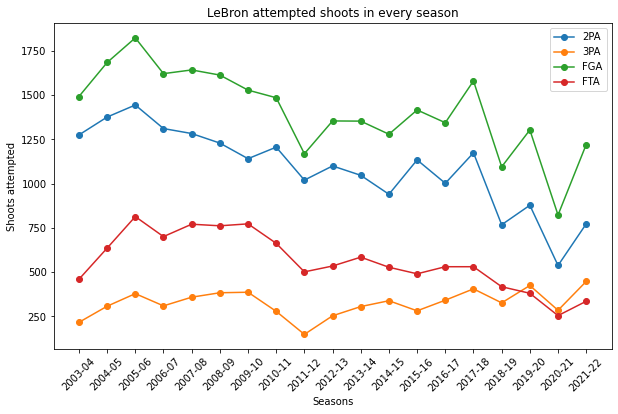

In [57]:
Season = list(LeB_C_Tot_RS['Season'])
DPA = list(LeB_C_Tot_RS['2PA'])
TPA = list(LeB_C_Tot_RS['3PA'])
FGA = list(LeB_C_Tot_RS['FGA'])
FTA = list(LeB_C_Tot_RS['FTA'])

plt.figure(figsize=(10, 6))
plt.plot(Season, DPA, '-o', label='2PA')
plt.plot(Season, TPA, '-o', label='3PA')
plt.plot(Season, FGA, '-o', label='FGA')
plt.plot(Season, FTA, '-o', label='FTA')
plt.title('LeBron attempted shoots in every season')
plt.xlabel('Seasons')
plt.ylabel('Shoots attempted')
plt.legend()
plt.xticks(rotation=45)
plt.show()

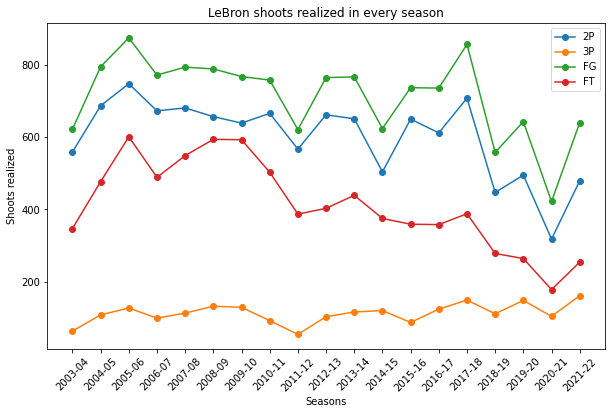

In [58]:
Season = list(LeB_C_Tot_RS['Season'])
DP = list(LeB_C_Tot_RS['2P'])
TP = list(LeB_C_Tot_RS['3P'])
FG = list(LeB_C_Tot_RS['FG'])
FT = list(LeB_C_Tot_RS['FT'])

plt.figure(figsize=(10, 6))
plt.plot(Season, DP, '-o', label='2P')
plt.plot(Season, TP, '-o', label='3P')
plt.plot(Season, FG, '-o', label='FG')
plt.plot(Season, FT, '-o', label='FT')
plt.title('LeBron shoots realized in every season')
plt.xlabel('Seasons')
plt.ylabel('Shoots realized')
plt.legend()
plt.xticks(rotation=45)
plt.show()

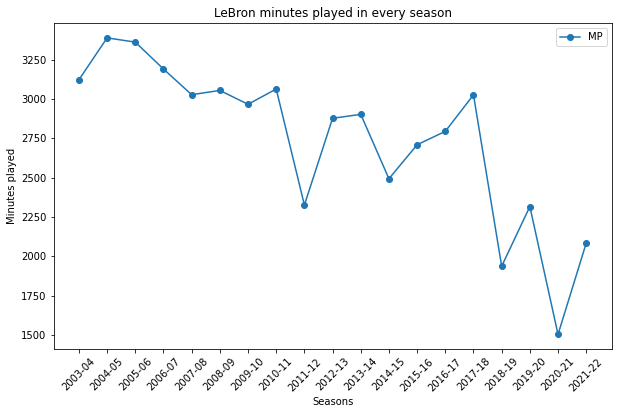

In [59]:
Season = list(LeB_C_Tot_RS['Season'])
MP = list(LeB_C_Tot_RS['MP'])

plt.figure(figsize=(10, 6))
plt.plot(Season, MP, '-o', label='MP')
plt.title('LeBron minutes played in every season')
plt.xlabel('Seasons')
plt.ylabel('Minutes played')
plt.legend()
plt.xticks(rotation=45)
plt.show()

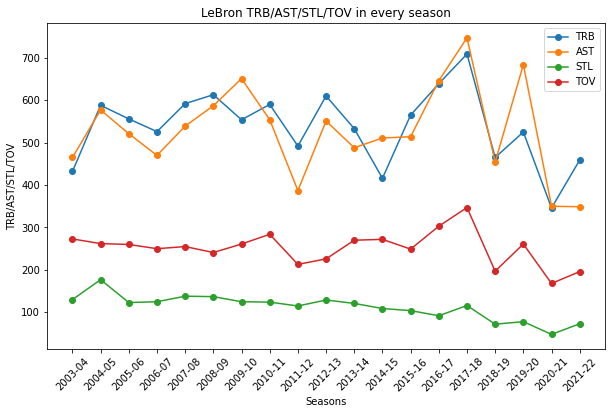

In [60]:
Season = list(LeB_C_Tot_RS['Season'])
TRB = list(LeB_C_Tot_RS['TRB'])
AST = list(LeB_C_Tot_RS['AST'])
STL = list(LeB_C_Tot_RS['STL'])
TOV = list(LeB_C_Tot_RS['TOV'])

plt.figure(figsize=(10, 6))
plt.plot(Season, TRB, '-o', label='TRB')
plt.plot(Season, AST, '-o', label='AST')
plt.plot(Season, STL, '-o', label='STL')
plt.plot(Season, TOV, '-o', label='TOV')
plt.title('LeBron TRB/AST/STL/TOV in every season')
plt.xlabel('Seasons')
plt.ylabel('TRB/AST/STL/TOV')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [61]:
#minuti totali per stagione
a = LeB_C_Tot_RS['MP'].max()
b = LeB_C_Tot_RS['MP'].mean()
c = LeB_C_Tot_RS['MP'].min()
[a, b, c]

[3388.0, 2744.157894736842, 1504.0]

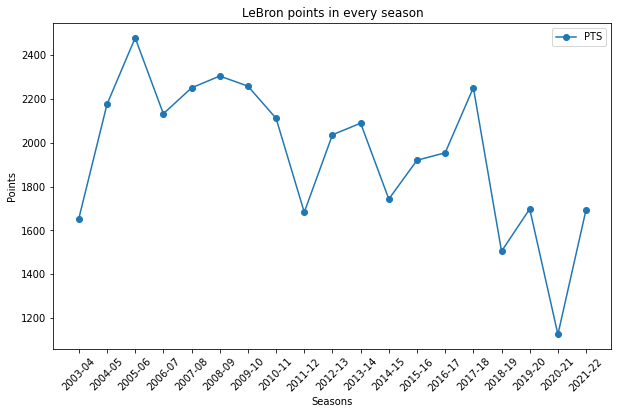

In [62]:
Season = list(LeB_C_Tot_RS['Season'])
PTS = list(LeB_C_Tot_RS['PTS'])

plt.figure(figsize=(10, 6))
plt.plot(Season, PTS, '-o', label='PTS')
plt.title('LeBron points in every season')
plt.xlabel('Seasons')
plt.ylabel('Points')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [63]:
#sommare punti a seconda della squadra e vedere con quale squadra ha una media punti più alta

a = LeB_C_Tot_RS['PTS'][0]
b = LeB_C_Tot_RS['PTS'][1]
c = LeB_C_Tot_RS['PTS'][2]
d = LeB_C_Tot_RS['PTS'][3]
e = LeB_C_Tot_RS['PTS'][4]
f = LeB_C_Tot_RS['PTS'][5]
g = LeB_C_Tot_RS['PTS'][6]
h = LeB_C_Tot_RS['PTS'][7]
i = LeB_C_Tot_RS['PTS'][8]
j = LeB_C_Tot_RS['PTS'][9]
k = LeB_C_Tot_RS['PTS'][10]
l = LeB_C_Tot_RS['PTS'][11]
m = LeB_C_Tot_RS['PTS'][12]
n = LeB_C_Tot_RS['PTS'][13]
o = LeB_C_Tot_RS['PTS'][14]
p = LeB_C_Tot_RS['PTS'][15]
q = LeB_C_Tot_RS['PTS'][16]
r = LeB_C_Tot_RS['PTS'][17]
s = LeB_C_Tot_RS['PTS'][18]

PTS_CLE = [a, b, c, d, e, f, g, l, m, n, o]
PTS_MIA = [h, i, j, k]
PTS_LAL = [p, q, r, s]

In [64]:
a = sum(PTS_CLE)/11
b = sum(PTS_MIA)/4
c = sum(PTS_LAL)/4
[a, b, c] #average points per season for every team

[2101.7272727272725, 1979.75, 1506.0]

In [65]:
#punti totali per stagione
a = LeB_C_Tot_RS['PTS'].max()
b = LeB_C_Tot_RS['PTS'].mean()
c = LeB_C_Tot_RS['PTS'].min()
[a, b, c]

[2478.0, 1950.6315789473683, 1126.0]

In [66]:
# Season = list(LeB_C_Tot_RS['Season'])
# TD = list(LeB_C_Tot_RS['Trp Dbl'])

# plt.figure(figsize=(10, 6))
# plt.plot(Season, TD, '-o', label='Trp Dbl')
# plt.title('LeBron triple double in every season')
# plt.xlabel('Seasons')
# plt.ylabel('Triple Double')
# plt.legend()
# plt.xticks(rotation=45)
# plt.show()

In [67]:
# a = LeB_C_Tot_RS['Trp Dbl'].max()
# b = LeB_C_Tot_RS['Trp Dbl'].mean()
# c = LeB_C_Tot_RS['Trp Dbl'].min()
# [a, b, c]

In [68]:
LBJ_Stats_Tot = LeB_C_Tot_RS.sort_values(by='Season')[['Season', 'PTS', 'AST', 'TRB', 'STL', 'TOV', 'FG', '3P', '2P', 'FT']]
LBJ_Stats_Tot.set_index('Season', inplace=True)
LBJ_Stats_Tot

,PTS,AST,TRB,STL,TOV,FG,3P,2P,FT
Season,,,,,,,,,
2003-04,1654.0,465.0,432.0,130.0,273.0,622.0,63.0,559.0,347.0
2004-05,2175.0,577.0,588.0,177.0,262.0,795.0,108.0,687.0,477.0
2005-06,2478.0,521.0,556.0,123.0,260.0,875.0,127.0,748.0,601.0
2006-07,2132.0,470.0,526.0,125.0,250.0,772.0,99.0,673.0,489.0
2007-08,2250.0,539.0,592.0,138.0,255.0,794.0,113.0,681.0,549.0
2008-09,2304.0,587.0,613.0,137.0,241.0,789.0,132.0,657.0,594.0
2009-10,2258.0,651.0,554.0,125.0,261.0,768.0,129.0,639.0,593.0
2010-11,2111.0,554.0,590.0,124.0,284.0,758.0,92.0,666.0,503.0
2011-12,1683.0,387.0,492.0,115.0,213.0,621.0,54.0,567.0,387.0


In [69]:
LBJ_Stats_Tot['PTS'].max() #index del max da trovare e da fare per altre stats

2478.0

In [70]:
massimo = LBJ_Stats_Tot['PTS'].max()
massimo

2478.0

In [71]:
LBJ_Stats_Tot[LBJ_Stats_Tot['PTS']==massimo].index

Index(['2005-06'], dtype='object', name='Season')

## Injuries

In [72]:
#LeBron_Career_Injuries = pd.read_html('https://www.foxsports.com/nba/lebron-james-player-injuries')

In [73]:
LeBron_Career_Injuries = pd.read_csv('LeBron_Injuries.csv', delimiter=';')

In [74]:
LeBron_Career_Injuries

,DATE,DESCRIPTION,NR. MATCH MISSED
0,02/12/2022,Knee,0
1,02/07/2022,Knee,0
2,01/27/2022,Knee,5
3,01/22/2022,Abdomen,0
4,01/20/2022,Abdominal,0
...,...,...,...
100,02/11/2019,Undisclosed,0
101,02/09/2019,Load Management,0
102,02/06/2019,Load Management,0
103,02/04/2019,Rest,1


In [75]:
#mettere colonna tabella con le partite saltate da LeBron per infortunio (excel su pc)

## Predictive model

In [76]:
#Time needed to overcome:
# Points: Kareem-Abdul Jabbar (38387) --> LeBron (37062)
# Minutes: Kareem-Abdul Jabbar (57446) --> LeBron (52139)
# Games: Robert Parish (1611) --> LeBron (1366)
# Field Goals Missed: Bryant (14481) --> LeBron (13282)

In [77]:
LeB_C_PG_RS1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 0 to 18
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Season  19 non-null     object 
 1   Age     19 non-null     float64
 2   Tm      19 non-null     object 
 3   Lg      19 non-null     object 
 4   Pos     19 non-null     object 
 5   G       19 non-null     float64
 6   GS      19 non-null     float64
 7   MP      19 non-null     float64
 8   FG      19 non-null     float64
 9   FGA     19 non-null     float64
 10  FG%     19 non-null     float64
 11  3P      19 non-null     float64
 12  3PA     19 non-null     float64
 13  3P%     19 non-null     float64
 14  2P      19 non-null     float64
 15  2PA     19 non-null     float64
 16  2P%     19 non-null     float64
 17  eFG%    19 non-null     float64
 18  FT      19 non-null     float64
 19  FTA     19 non-null     float64
 20  FT%     19 non-null     float64
 21  ORB     19 non-null     float64
 22  DRB 

In [78]:
new_datas = LeB_C_PG_RS1.drop(columns=['Season', 'Lg', 'PF', 'TOV', 'BLK', 'AST', 'STL', 'TRB', 'DRB', 'ORB', 'eFG%', 'GS', 'Pos', 'Tm'])
new_datas

,Age,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,PTS
0,19.0,79.0,39.5,7.9,18.9,0.417,0.8,2.7,0.290,7.1,16.1,0.438,4.4,5.8,0.754,20.9
1,20.0,80.0,42.4,9.9,21.1,0.472,1.4,3.9,0.351,8.6,17.2,0.499,6.0,8.0,0.750,27.2
2,21.0,79.0,42.5,11.1,23.1,0.480,1.6,4.8,0.335,9.5,18.3,0.518,7.6,10.3,0.738,31.4
3,22.0,78.0,40.9,9.9,20.8,0.476,1.3,4.0,0.319,8.6,16.8,0.513,6.3,9.0,0.698,27.3
4,23.0,75.0,40.4,10.6,21.9,0.484,1.5,4.8,0.315,9.1,17.1,0.531,7.3,10.3,0.712,30.0
5,24.0,81.0,37.7,9.7,19.9,0.489,1.6,4.7,0.344,8.1,15.2,0.535,7.3,9.4,0.780,28.4
6,25.0,76.0,39.0,10.1,20.1,0.503,1.7,5.1,0.333,8.4,15.0,0.560,7.8,10.2,0.767,29.7
7,26.0,79.0,38.8,9.6,18.8,0.510,1.2,3.5,0.330,8.4,15.3,0.552,6.4,8.4,0.759,26.7
8,27.0,62.0,37.5,10.0,18.9,0.531,0.9,2.4,0.362,9.1,16.5,0.556,6.2,8.1,0.771,27.1
9,28.0,76.0,37.9,10.1,17.8,0.565,1.4,3.3,0.406,8.7,14.5,0.602,5.3,7.0,0.753,26.8


In [79]:
new_datas['Tm Misc'] = [-12, 2, 22, 22, 8, 50, 40, 34, 26, 50, 26, 24, 32, 20, 18, -8, 33, 12, -16]

In [80]:
LeB_C_Tot_RS1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 0 to 18
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Season       19 non-null     object 
 1   Age          19 non-null     float64
 2   Tm           19 non-null     object 
 3   Lg           19 non-null     object 
 4   Pos          19 non-null     object 
 5   G            19 non-null     float64
 6   GS           19 non-null     float64
 7   MP           19 non-null     float64
 8   FG           19 non-null     float64
 9   FGA          19 non-null     float64
 10  FG%          19 non-null     float64
 11  3P           19 non-null     float64
 12  3PA          19 non-null     float64
 13  3P%          19 non-null     float64
 14  2P           19 non-null     float64
 15  2PA          19 non-null     float64
 16  2P%          19 non-null     float64
 17  eFG%         19 non-null     float64
 18  FT           19 non-null     float64
 19  FTA       

In [164]:
new_data = LeB_C_Tot_RS1.drop(columns=['Season', 'Lg', 'GS', 'Unnamed: 30', 'Trp Dbl', 'PF', 'TOV', 'STL', 'BLK', 'DRB', 'ORB', 'TRB', 'AST', 'Pos', 'eFG%', 'Tm', 'FG%', '3P%', '2P%', 'FT%'])
new_data

,Age,G,MP,FG,FGA,3P,3PA,2P,2PA,FT,FTA,PTS
0,19.0,79.0,3122.0,622.0,1492.0,63.0,217.0,559.0,1275.0,347.0,460.0,1654.0
1,20.0,80.0,3388.0,795.0,1684.0,108.0,308.0,687.0,1376.0,477.0,636.0,2175.0
2,21.0,79.0,3361.0,875.0,1823.0,127.0,379.0,748.0,1444.0,601.0,814.0,2478.0
3,22.0,78.0,3190.0,772.0,1621.0,99.0,310.0,673.0,1311.0,489.0,701.0,2132.0
4,23.0,75.0,3027.0,794.0,1642.0,113.0,359.0,681.0,1283.0,549.0,771.0,2250.0
5,24.0,81.0,3054.0,789.0,1613.0,132.0,384.0,657.0,1229.0,594.0,762.0,2304.0
6,25.0,76.0,2966.0,768.0,1528.0,129.0,387.0,639.0,1141.0,593.0,773.0,2258.0
7,26.0,79.0,3063.0,758.0,1485.0,92.0,279.0,666.0,1206.0,503.0,663.0,2111.0
8,27.0,62.0,2326.0,621.0,1169.0,54.0,149.0,567.0,1020.0,387.0,502.0,1683.0
9,28.0,76.0,2877.0,765.0,1354.0,103.0,254.0,662.0,1100.0,403.0,535.0,2036.0


In [165]:
new_data['Tm Misc'] = [-12, 2, 22, 22, 8, 50, 40, 34, 26, 50, 26, 24, 32, 20, 18, -8, 33, 12, -16]

In [175]:
X_train, X_test, y_train, y_test = train_test_split(new_data.drop(columns='PTS'), new_data['PTS'], test_size=0.5)

In [186]:
reg = Lasso(fit_intercept=False).fit(X_train, y_train)

In [187]:
print(reg.intercept_)
print(reg.coef_)
print(mean_squared_error(reg.predict(X_train),y_train))
print(mean_squared_error(reg.predict(X_test),y_test))
print(reg.score(X_train,y_train))
print(reg.score(X_test,y_test))

0.0
[ 1.63638654  1.3378561   0.12016639  1.42355805 -0.07746034 -0.3239629
  0.53880527  0.01304835 -0.15165306  0.96448557  0.31158452  0.88333842]
272.0587647170748
2180.567646722529
0.9961023030671314
0.9841900610610672


# Season 2020/2021 analysis:
* +/- effort by players assuming their role, Advanced Stats
* Season trends, Per Game Stats

## Advanced Stats

In [86]:
data_adv = pd.read_html('https://www.basketball-reference.com/leagues/NBA_2021_advanced.html')
df_adv = pd.DataFrame(data_adv[0])
Adv_Stats = df_adv.where(df_adv["Player"] != "Player").dropna(how='all',axis=0)
Adv_Stats

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,Unnamed: 19,OWS,DWS,WS,WS/48,Unnamed: 24,OBPM,DBPM,BPM,VORP
0,1,Precious Achiuwa,PF,21,MIA,61,737,14.2,.550,.004,...,NaN,0.3,1.0,1.3,.085,NaN,-3.6,-0.5,-4.1,-0.4
1,2,Jaylen Adams,PG,24,MIL,7,18,-6.5,.125,.250,...,NaN,-0.1,0.0,-0.1,-0.252,NaN,-15.1,-4.6,-19.8,-0.1
2,3,Steven Adams,C,27,NOP,58,1605,15.1,.596,.010,...,NaN,2.3,1.7,4.0,.119,NaN,-0.4,0.1,-0.3,0.7
3,4,Bam Adebayo,C,23,MIA,64,2143,22.7,.626,.010,...,NaN,5.6,3.2,8.8,.197,NaN,2.9,2.0,4.9,3.7
4,5,LaMarcus Aldridge,C,35,TOT,26,674,15.7,.556,.270,...,NaN,0.5,0.6,1.1,.080,NaN,-0.2,-0.2,-0.3,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,536,Delon Wright,PG,28,SAC,27,696,15.9,.563,.369,...,NaN,0.8,0.5,1.3,.092,NaN,0.5,0.6,1.2,0.6
727,537,Thaddeus Young,PF,32,CHI,68,1652,20.3,.578,.068,...,NaN,2.8,2.2,5.1,.147,NaN,1.9,1.4,3.3,2.2
728,538,Trae Young,PG,22,ATL,63,2125,23.0,.589,.357,...,NaN,5.9,1.3,7.2,.163,NaN,5.3,-1.7,3.7,3.0
729,539,Cody Zeller,C,28,CHO,48,1005,18.2,.599,.086,...,NaN,2.1,1.1,3.3,.156,NaN,-0.2,-0.2,-0.5,0.4


In [87]:
df_adv.to_csv('df_AdvStats.csv', index=False)

In [88]:
Adv_Stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 705 entries, 0 to 730
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rk           705 non-null    object 
 1   Player       705 non-null    object 
 2   Pos          705 non-null    object 
 3   Age          705 non-null    object 
 4   Tm           705 non-null    object 
 5   G            705 non-null    object 
 6   MP           705 non-null    object 
 7   PER          705 non-null    object 
 8   TS%          703 non-null    object 
 9   3PAr         703 non-null    object 
 10  FTr          703 non-null    object 
 11  ORB%         705 non-null    object 
 12  DRB%         705 non-null    object 
 13  TRB%         705 non-null    object 
 14  AST%         705 non-null    object 
 15  STL%         705 non-null    object 
 16  BLK%         705 non-null    object 
 17  TOV%         704 non-null    object 
 18  USG%         705 non-null    object 
 19  Unnamed:

In [89]:
for el in Adv_Stats:
  if(el != "Player" and el != "Pos"  and el != "Tm"):
    Adv_Stats[el] = pd.to_numeric(Adv_Stats[el])

In [90]:
Adv_Stats.drop(['Rk', 'Unnamed: 19', 'Unnamed: 24'], axis=1, inplace=True)
Adv_Stats

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Precious Achiuwa,PF,21,MIA,61,737,14.2,0.550,0.004,0.482,...,13.5,19.5,0.3,1.0,1.3,0.085,-3.6,-0.5,-4.1,-0.4
1,Jaylen Adams,PG,24,MIL,7,18,-6.5,0.125,0.250,0.000,...,0.0,18.6,-0.1,0.0,-0.1,-0.252,-15.1,-4.6,-19.8,-0.1
2,Steven Adams,C,27,NOP,58,1605,15.1,0.596,0.010,0.438,...,17.5,11.7,2.3,1.7,4.0,0.119,-0.4,0.1,-0.3,0.7
3,Bam Adebayo,C,23,MIA,64,2143,22.7,0.626,0.010,0.443,...,15.0,23.7,5.6,3.2,8.8,0.197,2.9,2.0,4.9,3.7
4,LaMarcus Aldridge,C,35,TOT,26,674,15.7,0.556,0.270,0.159,...,7.9,22.2,0.5,0.6,1.1,0.080,-0.2,-0.2,-0.3,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,Delon Wright,PG,28,SAC,27,696,15.9,0.563,0.369,0.160,...,12.7,17.1,0.8,0.5,1.3,0.092,0.5,0.6,1.2,0.6
727,Thaddeus Young,PF,32,CHI,68,1652,20.3,0.578,0.068,0.171,...,16.1,22.3,2.8,2.2,5.1,0.147,1.9,1.4,3.3,2.2
728,Trae Young,PG,22,ATL,63,2125,23.0,0.589,0.357,0.491,...,16.2,33.0,5.9,1.3,7.2,0.163,5.3,-1.7,3.7,3.0
729,Cody Zeller,C,28,CHO,48,1005,18.2,0.599,0.086,0.367,...,11.9,18.3,2.1,1.1,3.3,0.156,-0.2,-0.2,-0.5,0.4


In [91]:
Adv_Stats['TOV%'].fillna(0, inplace=True)
Adv_Stats['TS%'].fillna(0, inplace=True)
Adv_Stats['3PAr'].fillna(0, inplace=True)
Adv_Stats['FTr'].fillna(0, inplace=True)
Adv_Stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 705 entries, 0 to 730
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  705 non-null    object 
 1   Pos     705 non-null    object 
 2   Age     705 non-null    int64  
 3   Tm      705 non-null    object 
 4   G       705 non-null    int64  
 5   MP      705 non-null    int64  
 6   PER     705 non-null    float64
 7   TS%     705 non-null    float64
 8   3PAr    705 non-null    float64
 9   FTr     705 non-null    float64
 10  ORB%    705 non-null    float64
 11  DRB%    705 non-null    float64
 12  TRB%    705 non-null    float64
 13  AST%    705 non-null    float64
 14  STL%    705 non-null    float64
 15  BLK%    705 non-null    float64
 16  TOV%    705 non-null    float64
 17  USG%    705 non-null    float64
 18  OWS     705 non-null    float64
 19  DWS     705 non-null    float64
 20  WS      705 non-null    float64
 21  WS/48   705 non-null    float64
 22  OB

In [92]:
#Adv_Stats.drop(['Rk', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'FTr'], axis=1, inplace=True)

In [93]:
Adv_Stats_1 = Adv_Stats.where(Adv_Stats["Tm"] != "TOT").dropna(how='all',axis=0) #da mettere per togliere i totali
Adv_Stats_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 626 entries, 0 to 730
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  626 non-null    object 
 1   Pos     626 non-null    object 
 2   Age     626 non-null    float64
 3   Tm      626 non-null    object 
 4   G       626 non-null    float64
 5   MP      626 non-null    float64
 6   PER     626 non-null    float64
 7   TS%     626 non-null    float64
 8   3PAr    626 non-null    float64
 9   FTr     626 non-null    float64
 10  ORB%    626 non-null    float64
 11  DRB%    626 non-null    float64
 12  TRB%    626 non-null    float64
 13  AST%    626 non-null    float64
 14  STL%    626 non-null    float64
 15  BLK%    626 non-null    float64
 16  TOV%    626 non-null    float64
 17  USG%    626 non-null    float64
 18  OWS     626 non-null    float64
 19  DWS     626 non-null    float64
 20  WS      626 non-null    float64
 21  WS/48   626 non-null    float64
 22  OB

In [94]:
Adv_Stats_1.describe()

,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
count,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,...,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000
mean,25.728435,36.827476,833.063898,12.641214,0.539903,0.392224,0.266970,4.792492,15.484505,10.137220,...,12.754313,18.502556,0.909744,0.845527,1.757188,0.070399,-1.715335,-0.180032,-1.896645,0.420767
std,4.096405,21.790911,690.067363,6.957372,0.113518,0.225744,0.281345,4.158976,6.708752,4.788026,...,7.520225,5.624108,1.562936,0.830453,2.197137,0.108498,4.210557,1.581503,5.072076,1.022648
min,19.000000,1.000000,3.000000,-40.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-2.900000,0.000000,-1.900000,-1.113000,-40.700000,-8.600000,-46.600000,-1.700000
25%,23.000000,18.000000,218.000000,9.625000,0.503250,0.239250,0.143000,1.900000,10.800000,6.525000,...,9.325000,14.625000,0.000000,0.200000,0.200000,0.036000,-3.300000,-1.000000,-3.600000,-0.100000
50%,25.000000,36.000000,674.000000,12.500000,0.552000,0.409500,0.227000,3.300000,14.400000,9.100000,...,11.650000,18.000000,0.300000,0.600000,0.900000,0.080000,-1.400000,-0.200000,-1.400000,0.100000
75%,28.000000,57.750000,1347.000000,16.300000,0.598000,0.543750,0.314000,6.475000,18.900000,12.575000,...,14.800000,21.700000,1.400000,1.300000,2.800000,0.124750,0.400000,0.700000,0.600000,0.600000
max,40.000000,72.000000,2667.000000,54.600000,1.078000,1.000000,4.000000,27.400000,41.400000,31.100000,...,100.000000,41.400000,12.200000,5.200000,15.600000,0.475000,24.100000,8.200000,31.100000,8.800000


In [95]:
Adv_Stats_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 626 entries, 0 to 730
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  626 non-null    object 
 1   Pos     626 non-null    object 
 2   Age     626 non-null    float64
 3   Tm      626 non-null    object 
 4   G       626 non-null    float64
 5   MP      626 non-null    float64
 6   PER     626 non-null    float64
 7   TS%     626 non-null    float64
 8   3PAr    626 non-null    float64
 9   FTr     626 non-null    float64
 10  ORB%    626 non-null    float64
 11  DRB%    626 non-null    float64
 12  TRB%    626 non-null    float64
 13  AST%    626 non-null    float64
 14  STL%    626 non-null    float64
 15  BLK%    626 non-null    float64
 16  TOV%    626 non-null    float64
 17  USG%    626 non-null    float64
 18  OWS     626 non-null    float64
 19  DWS     626 non-null    float64
 20  WS      626 non-null    float64
 21  WS/48   626 non-null    float64
 22  OB

In [96]:
Adv_Stats_1.to_csv('Adv_Stats_1.csv', index=False)

In [97]:
Adv_Stats_1[['Pos', 'Tm']].describe()

,Pos,Tm
count,626,626
unique,5,30
top,SG,HOU
freq,147,30


<AxesSubplot:>

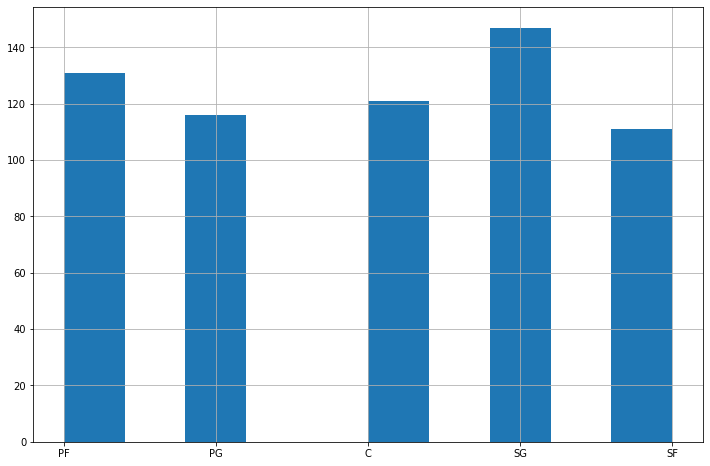

In [98]:
Adv_Stats_1['Pos'].hist(bins=10, figsize=(12, 8))

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'G'}>,
        <AxesSubplot:title={'center':'MP'}>,
        <AxesSubplot:title={'center':'PER'}>,
        <AxesSubplot:title={'center':'TS%'}>],
       [<AxesSubplot:title={'center':'3PAr'}>,
        <AxesSubplot:title={'center':'FTr'}>,
        <AxesSubplot:title={'center':'ORB%'}>,
        <AxesSubplot:title={'center':'DRB%'}>,
        <AxesSubplot:title={'center':'TRB%'}>],
       [<AxesSubplot:title={'center':'AST%'}>,
        <AxesSubplot:title={'center':'STL%'}>,
        <AxesSubplot:title={'center':'BLK%'}>,
        <AxesSubplot:title={'center':'TOV%'}>,
        <AxesSubplot:title={'center':'USG%'}>],
       [<AxesSubplot:title={'center':'OWS'}>,
        <AxesSubplot:title={'center':'DWS'}>,
        <AxesSubplot:title={'center':'WS'}>,
        <AxesSubplot:title={'center':'WS/48'}>,
        <AxesSubplot:title={'center':'OBPM'}>],
       [<AxesSubplot:title={'center':'DBPM'}>,
        <AxesSubplot:

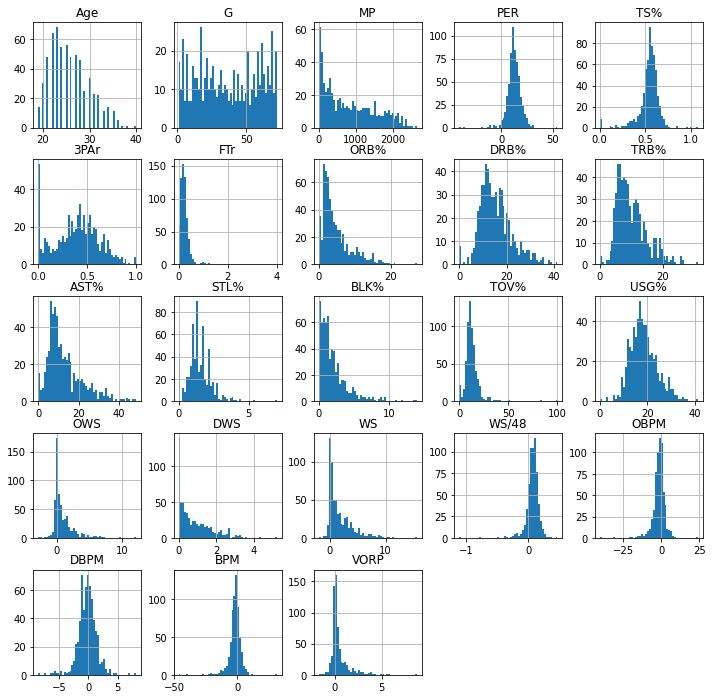

In [99]:
Adv_Stats_1.hist(bins=50, figsize=(12,12))

<AxesSubplot:>

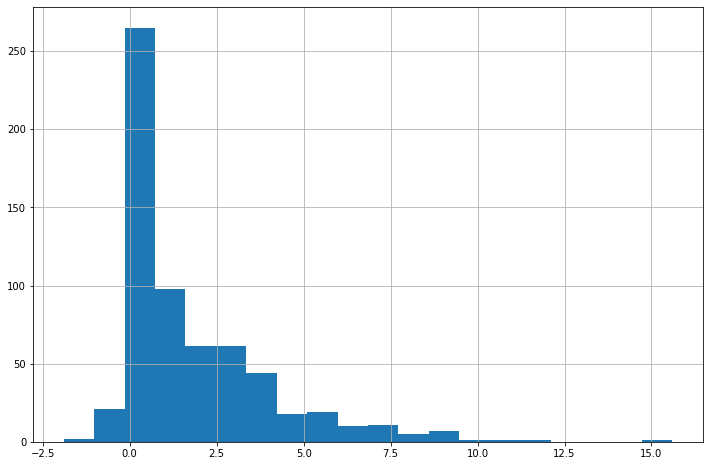

In [100]:
Adv_Stats_1['WS'].hist(bins=20, figsize=(12,8))

In [101]:
#interesting stats, max/mean/min of WS/OWS/DWS/OBPM/DBPM/BPM/VORP

array([[<AxesSubplot:title={'center':'WS'}>,
        <AxesSubplot:title={'center':'WS/48'}>],
       [<AxesSubplot:title={'center':'OWS'}>,
        <AxesSubplot:title={'center':'DWS'}>]], dtype=object)

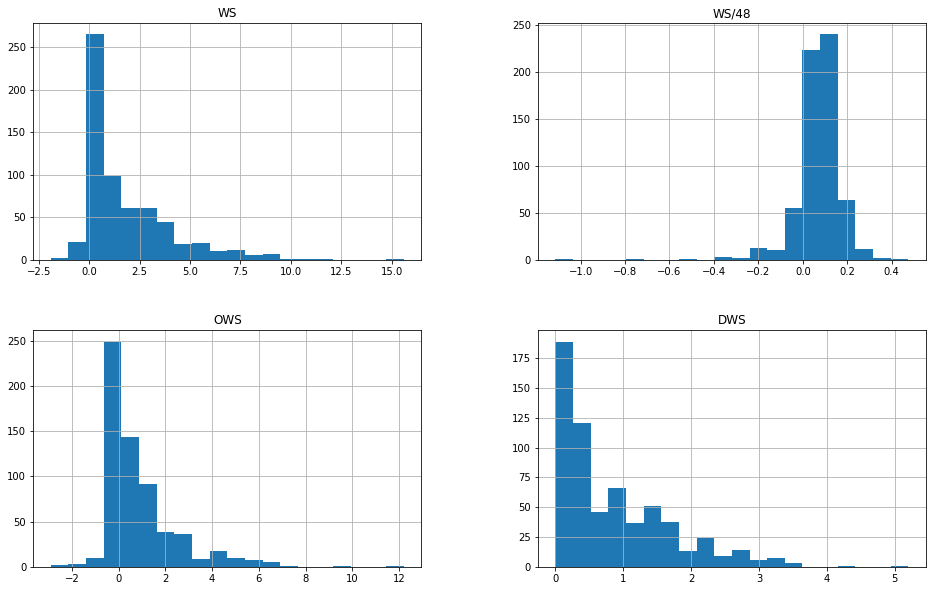

In [102]:
Adv_Stats_1[['WS', 'WS/48', 'OWS', 'DWS']].hist(bins=20, figsize=(16,10))

In [103]:
a = Adv_Stats_1['WS'].mean()
b = Adv_Stats_1['WS/48'].mean()
c = Adv_Stats_1['OWS'].mean()
d = Adv_Stats_1['DWS'].mean()
[a, b, c, d]

[1.7571884984025559,
 0.07039936102236422,
 0.9097444089456869,
 0.8455271565495207]

In [104]:
a = Adv_Stats_1['WS'].min()
b = Adv_Stats_1['WS/48'].min()
c = Adv_Stats_1['OWS'].min()
d = Adv_Stats_1['DWS'].min()
[a, b, c, d]

[-1.9, -1.113, -2.9, 0.0]

In [105]:
a = Adv_Stats_1['WS'].max()
b = Adv_Stats_1['WS/48'].max()
c = Adv_Stats_1['OWS'].max()
d = Adv_Stats_1['DWS'].max()
[a, b, c, d]

[15.6, 0.475, 12.2, 5.2]

In [106]:
players_by_most_win_share = Adv_Stats_1.sort_values(by='WS', ascending=False)[['Player', 'WS', 'WS/48', 'OWS', 'DWS']]
players_by_most_win_share.set_index('Player', inplace=True)
players_by_most_win_share

,WS,WS/48,OWS,DWS
Player,,,,
Nikola Jokić,15.6,0.301,12.2,3.4
Rudy Gobert,11.3,0.248,6.1,5.2
Damian Lillard,10.4,0.209,9.6,0.8
Giannis Antetokounmpo,10.2,0.244,6.9,3.3
Jimmy Butler,9.3,0.255,6.6,2.7
...,...,...,...,...
Théo Maledon,-0.8,-0.021,-1.9,1.1
Josh Hall,-0.9,-0.126,-1.1,0.2
Darius Bazley,-0.9,-0.026,-2.3,1.4


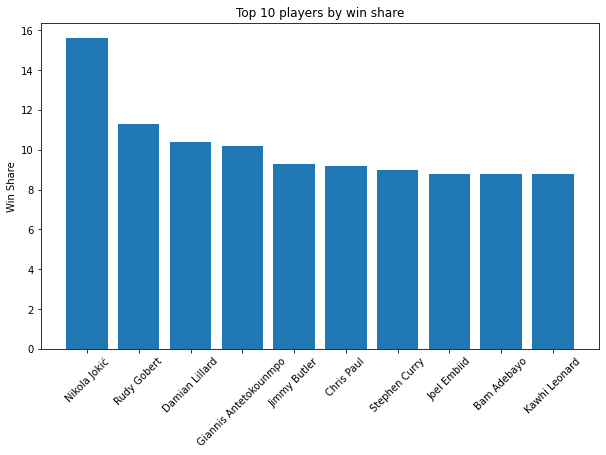

In [107]:
x = players_by_most_win_share[:10].index
y = players_by_most_win_share[:10]['WS']
plt.figure(figsize=(10,6))
plt.title('Top 10 players by win share')
plt.bar(x, y)
plt.ylabel('Win Share')
plt.xticks(rotation=45)
plt.show()

In [108]:
a = players_by_most_win_share['WS']['Stephen Curry']
b = players_by_most_win_share['WS']['LeBron James']
c = players_by_most_win_share['WS']['Giannis Antetokounmpo']
d = players_by_most_win_share['WS']['John Wall']
[a, b, c, d]

[9.0, 5.6, 10.2, -0.2]

In [109]:
players_by_most_win_share['WS'].mean()

1.7571884984025559

In [110]:
players_by_most_win_share = Adv_Stats_1.sort_values(by='WS')[['Player', 'WS', 'WS/48', 'OWS', 'DWS']]
players_by_most_win_share.set_index('Player', inplace=True)
players_by_most_win_share

,WS,WS/48,OWS,DWS
Player,,,,
Aleksej Pokusevski,-1.9,-0.084,-2.9,1.0
Killian Hayes,-1.1,-0.081,-1.8,0.6
Josh Hall,-0.9,-0.126,-1.1,0.2
Darius Bazley,-0.9,-0.026,-2.3,1.4
Théo Maledon,-0.8,-0.021,-1.9,1.1
...,...,...,...,...
Jimmy Butler,9.3,0.255,6.6,2.7
Giannis Antetokounmpo,10.2,0.244,6.9,3.3
Damian Lillard,10.4,0.209,9.6,0.8


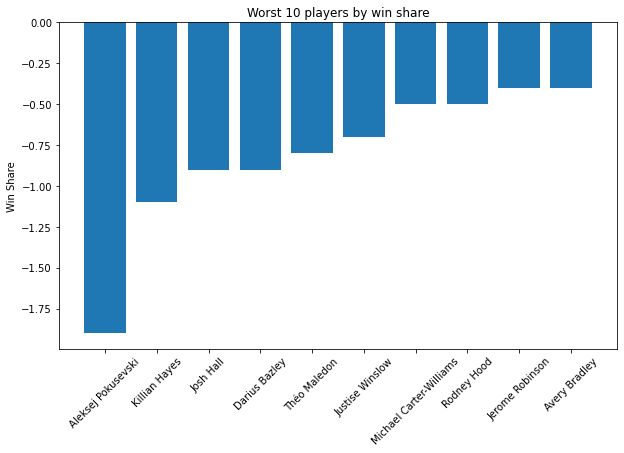

In [111]:
x = players_by_most_win_share[:10].index
y = players_by_most_win_share[:10]['WS']
plt.figure(figsize=(10,6))
plt.title('Worst 10 players by win share')
plt.bar(x, y)
plt.ylabel('Win Share')
plt.xticks(rotation=45)
plt.show()

In [112]:
Adv_players_groupby = Adv_Stats_1.groupby('Player')

In [113]:
Adv_players_groupby_sum = Adv_players_groupby.sum()

In [114]:
a = Adv_players_groupby_sum['WS'].loc['LeBron James']
b = Adv_players_groupby_sum['WS'].loc['Stephen Curry']
c = Adv_players_groupby_sum['WS'].loc['Nikola Jokić']
[a, b, c]

[5.6, 9.0, 15.6]

<AxesSubplot:>

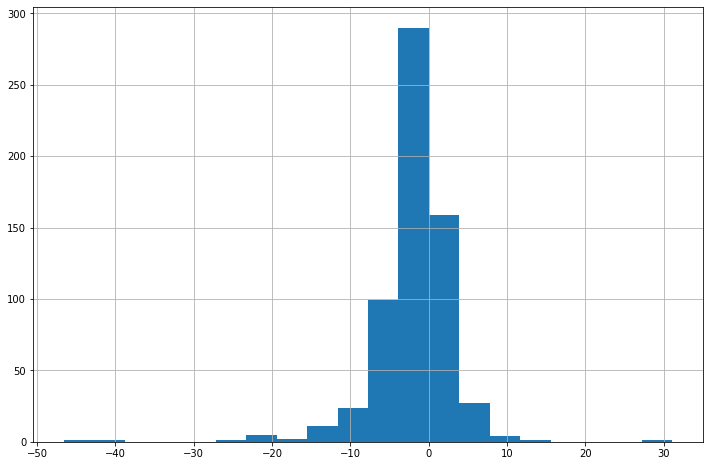

In [115]:
Adv_Stats_1['BPM'].hist(bins=20, figsize=(12, 8))

array([[<AxesSubplot:title={'center':'BPM'}>,
        <AxesSubplot:title={'center':'OBPM'}>],
       [<AxesSubplot:title={'center':'DBPM'}>,
        <AxesSubplot:title={'center':'VORP'}>]], dtype=object)

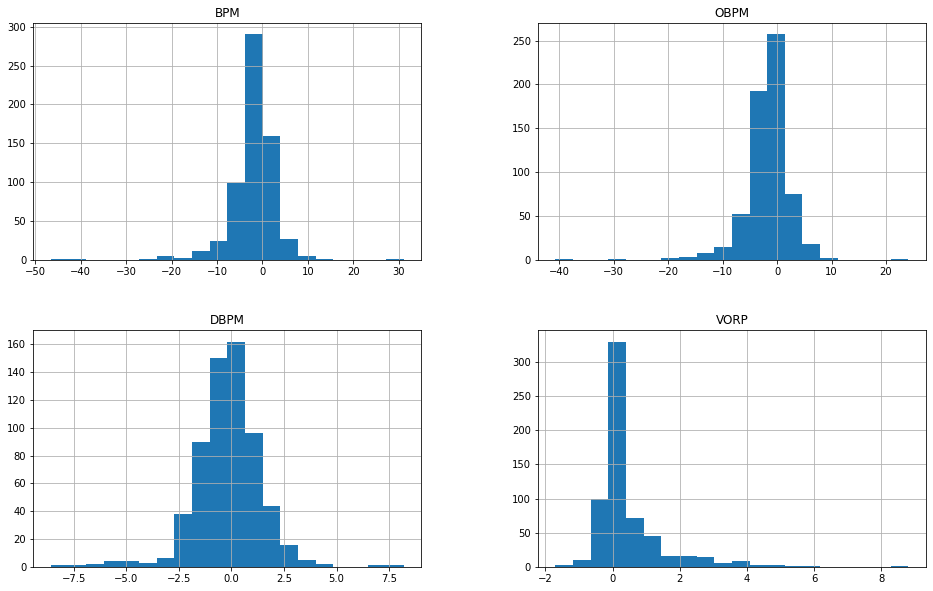

In [116]:
Adv_Stats_1[['BPM', 'OBPM', 'DBPM', 'VORP']].hist(bins=20, figsize=(16,10))

In [117]:
a = Adv_Stats_1['BPM'].mean()
b = Adv_Stats_1['VORP'].mean()
c = Adv_Stats_1['OBPM'].mean()
d = Adv_Stats_1['DBPM'].mean()
[a, b, c, d]

[-1.8966453674121404,
 0.42076677316293926,
 -1.7153354632587858,
 -0.1800319488817891]

In [118]:
a = Adv_Stats_1['BPM'].min()
b = Adv_Stats_1['VORP'].min()
c = Adv_Stats_1['OBPM'].min()
d = Adv_Stats_1['DBPM'].min()
[a, b, c, d]

[-46.6, -1.7, -40.7, -8.6]

In [119]:
a = Adv_Stats_1['BPM'].max()
b = Adv_Stats_1['VORP'].max()
c = Adv_Stats_1['OBPM'].max()
d = Adv_Stats_1['DBPM'].max()
[a, b, c, d]

[31.1, 8.8, 24.1, 8.2]

In [120]:
players_by_most_BPM = Adv_Stats_1.sort_values(by='BPM', ascending=False)[['Player', 'BPM', 'OBPM', 'DBPM', 'VORP']]
players_by_most_BPM.set_index('Player', inplace=True)
players_by_most_BPM

,BPM,OBPM,DBPM,VORP
Player,,,,
Udonis Haslem,31.1,24.1,7.0,0.0
Nikola Jokić,12.1,9.1,3.0,8.8
Gary Payton II,9.2,1.0,8.2,0.1
Giannis Antetokounmpo,9.0,6.2,2.8,5.6
Stephen Curry,8.7,8.3,0.4,5.8
...,...,...,...,...
Ignas Brazdeikis,-21.4,-15.2,-6.2,0.0
Jared Harper,-22.1,-16.6,-5.5,-0.1
Noah Vonleh,-26.7,-20.9,-5.8,-0.1


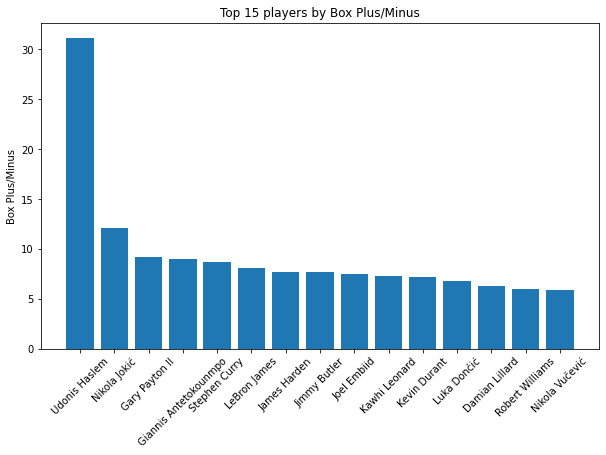

In [121]:
x = players_by_most_BPM[:15].index
y = players_by_most_BPM[:15]['BPM']
plt.figure(figsize=(10,6))
plt.title('Top 15 players by Box Plus/Minus')
plt.bar(x, y)
plt.ylabel('Box Plus/Minus')
plt.xticks(rotation=45)
plt.show()

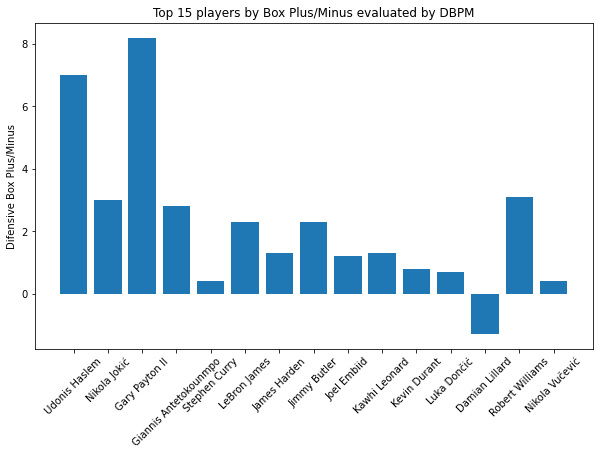

In [122]:
x = players_by_most_BPM[:15].index
y = players_by_most_BPM[:15]['DBPM']
plt.figure(figsize=(10,6))
plt.title('Top 15 players by Box Plus/Minus evaluated by DBPM')
plt.bar(x, y)
plt.ylabel('Difensive Box Plus/Minus')
plt.xticks(rotation=45)
plt.show()

In [123]:
a = players_by_most_BPM['BPM']['Stephen Curry']
b = players_by_most_BPM['BPM']['LeBron James']
c = players_by_most_BPM['BPM']['Lonzo Ball']
d = players_by_most_BPM['BPM']['Seth Curry']
e = players_by_most_BPM['BPM']['DeMar DeRozan']
[a, b, c, d, e]

[8.7, 8.1, 1.7, -0.3, 3.1]

In [124]:
players_by_most_BPM['BPM']['James Harden']

Player
James Harden    7.7
James Harden    5.0
Name: BPM, dtype: float64

In [125]:
players_by_most_VORP = Adv_Stats_1.sort_values(by='VORP', ascending=False)[['Player', 'VORP', 'BPM', 'OBPM', 'DBPM']]
players_by_most_VORP.set_index('Player', inplace=True)
players_by_most_VORP

,VORP,BPM,OBPM,DBPM
Player,,,,
Nikola Jokić,8.8,12.1,9.1,3.0
Stephen Curry,5.8,8.7,8.3,0.4
Giannis Antetokounmpo,5.6,9.0,6.2,2.8
Luka Dončić,5.1,6.8,6.1,0.7
Damian Lillard,5.0,6.3,7.5,-1.3
...,...,...,...,...
Darius Bazley,-1.0,-4.4,-3.1,-1.3
Aleksej Pokusevski,-1.1,-6.1,-5.1,-1.0
Théo Maledon,-1.3,-5.0,-4.0,-1.0


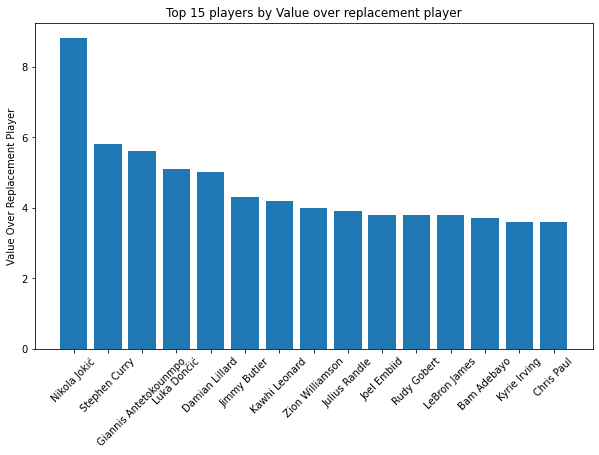

In [126]:
x = players_by_most_VORP[:15].index
y = players_by_most_VORP[:15]['VORP']
plt.figure(figsize=(10,6))
plt.title('Top 15 players by Value over replacement player')
plt.bar(x, y)
plt.ylabel('Value Over Replacement Player')
plt.xticks(rotation=45)
plt.show()

In [127]:
#fare medie divise per ruolo per WS e BPM 
# Adv_Stats_1['BPM'] oppure Adv_Stats_1['WS'] poi fare distribuzione tenendo conto dei ruoli
#da fare anche per stats per game

## Per Game Stats

In [128]:
data = pd.read_html("https://www.basketball-reference.com/leagues/NBA_2021_per_game.html")
df_xGStats = pd.DataFrame(data[0])
xG_Stats = df_xGStats.where(df_xGStats["Player"] != "Player").dropna(how='all', axis=0)

In [129]:
df_xGStats.to_csv('df_xGStats.csv', index=False)

In [130]:
xG_Stats_1 = xG_Stats.where(xG_Stats["Tm"] != "TOT").dropna(how='all', axis=0)
xG_Stats_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 626 entries, 0 to 730
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rk      626 non-null    object
 1   Player  626 non-null    object
 2   Pos     626 non-null    object
 3   Age     626 non-null    object
 4   Tm      626 non-null    object
 5   G       626 non-null    object
 6   GS      626 non-null    object
 7   MP      626 non-null    object
 8   FG      626 non-null    object
 9   FGA     626 non-null    object
 10  FG%     624 non-null    object
 11  3P      626 non-null    object
 12  3PA     626 non-null    object
 13  3P%     593 non-null    object
 14  2P      626 non-null    object
 15  2PA     626 non-null    object
 16  2P%     620 non-null    object
 17  eFG%    624 non-null    object
 18  FT      626 non-null    object
 19  FTA     626 non-null    object
 20  FT%     598 non-null    object
 21  ORB     626 non-null    object
 22  DRB     626 non-null    ob

In [131]:
xG_Stats_1.drop('Rk', axis=1, inplace=True)

In [132]:
for el in xG_Stats_1:
  if(el != "Player" and el != "Pos"  and el != "Tm"):
    xG_Stats_1[el] = pd.to_numeric(xG_Stats_1[el])

In [133]:
xG_Stats_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 626 entries, 0 to 730
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  626 non-null    object 
 1   Pos     626 non-null    object 
 2   Age     626 non-null    int64  
 3   Tm      626 non-null    object 
 4   G       626 non-null    int64  
 5   GS      626 non-null    int64  
 6   MP      626 non-null    float64
 7   FG      626 non-null    float64
 8   FGA     626 non-null    float64
 9   FG%     624 non-null    float64
 10  3P      626 non-null    float64
 11  3PA     626 non-null    float64
 12  3P%     593 non-null    float64
 13  2P      626 non-null    float64
 14  2PA     626 non-null    float64
 15  2P%     620 non-null    float64
 16  eFG%    624 non-null    float64
 17  FT      626 non-null    float64
 18  FTA     626 non-null    float64
 19  FT%     598 non-null    float64
 20  ORB     626 non-null    float64
 21  DRB     626 non-null    float64
 22  TR

In [134]:
xG_Stats_1.describe()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,624.000000,626.000000,626.000000,593.000000,...,598.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000
mean,25.728435,36.827476,17.252396,19.526837,3.201118,7.007668,0.443099,0.974601,2.746006,0.313315,...,0.751062,0.807827,2.783387,3.590256,1.949361,0.612460,0.415974,1.080511,1.627157,8.715974
std,4.096405,21.790911,22.015199,9.367063,2.327811,4.809408,0.115565,0.895416,2.268940,0.129626,...,0.151528,0.737207,1.835580,2.404792,1.846313,0.400286,0.417268,0.833482,0.776349,6.411899
min,19.000000,1.000000,0.000000,1.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,18.000000,0.000000,12.100000,1.400000,3.400000,0.397750,0.200000,0.900000,0.269000,...,0.682000,0.300000,1.500000,1.900000,0.700000,0.300000,0.100000,0.500000,1.100000,4.000000
50%,25.000000,36.000000,5.000000,19.500000,2.700000,5.900000,0.440500,0.750000,2.300000,0.340000,...,0.776000,0.600000,2.500000,3.200000,1.400000,0.600000,0.300000,0.900000,1.600000,7.200000
75%,28.000000,57.750000,30.000000,27.300000,4.400000,9.400000,0.497250,1.500000,4.275000,0.389000,...,0.845750,1.000000,3.775000,4.800000,2.500000,0.900000,0.600000,1.400000,2.100000,11.975000
max,40.000000,72.000000,72.000000,37.600000,11.200000,23.000000,1.000000,5.300000,12.700000,1.000000,...,1.000000,4.700000,10.100000,14.300000,11.700000,2.100000,3.400000,5.000000,4.000000,32.000000


In [135]:
#fillna con le percentuali = 0 quindi aggiungere 0 dove manca
xG_Stats_1['FG%'].fillna(0, inplace=True)
xG_Stats_1['3P%'].fillna(0, inplace=True)
xG_Stats_1['2P%'].fillna(0, inplace=True)
xG_Stats_1['eFG%'].fillna(0, inplace=True)
xG_Stats_1['FT%'].fillna(0, inplace=True)
xG_Stats_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 626 entries, 0 to 730
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  626 non-null    object 
 1   Pos     626 non-null    object 
 2   Age     626 non-null    int64  
 3   Tm      626 non-null    object 
 4   G       626 non-null    int64  
 5   GS      626 non-null    int64  
 6   MP      626 non-null    float64
 7   FG      626 non-null    float64
 8   FGA     626 non-null    float64
 9   FG%     626 non-null    float64
 10  3P      626 non-null    float64
 11  3PA     626 non-null    float64
 12  3P%     626 non-null    float64
 13  2P      626 non-null    float64
 14  2PA     626 non-null    float64
 15  2P%     626 non-null    float64
 16  eFG%    626 non-null    float64
 17  FT      626 non-null    float64
 18  FTA     626 non-null    float64
 19  FT%     626 non-null    float64
 20  ORB     626 non-null    float64
 21  DRB     626 non-null    float64
 22  TR

In [136]:
#rimuovere qualche variabile sulla quale non fare nessuna task, ad esempio PF, eFG% ecc.

In [137]:
#replace some special letters with letters in the keyboard

In [138]:
xG_Stats_1.to_csv('xG_Stats_1.csv', index=False)

In [139]:
#fare plot con una variabile e tutti i giocatori per vedere le varie similutidini ecc

<AxesSubplot:>

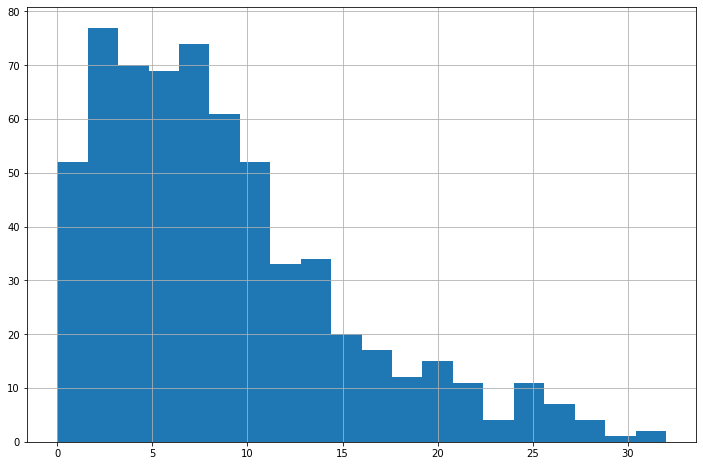

In [140]:
xG_Stats_1['PTS'].hist(bins=20, figsize=(12, 8))

array([[<AxesSubplot:title={'center':'PTS'}>,
        <AxesSubplot:title={'center':'AST'}>],
       [<AxesSubplot:title={'center':'TRB'}>,
        <AxesSubplot:title={'center':'MP'}>],
       [<AxesSubplot:title={'center':'BLK'}>,
        <AxesSubplot:title={'center':'STL'}>]], dtype=object)

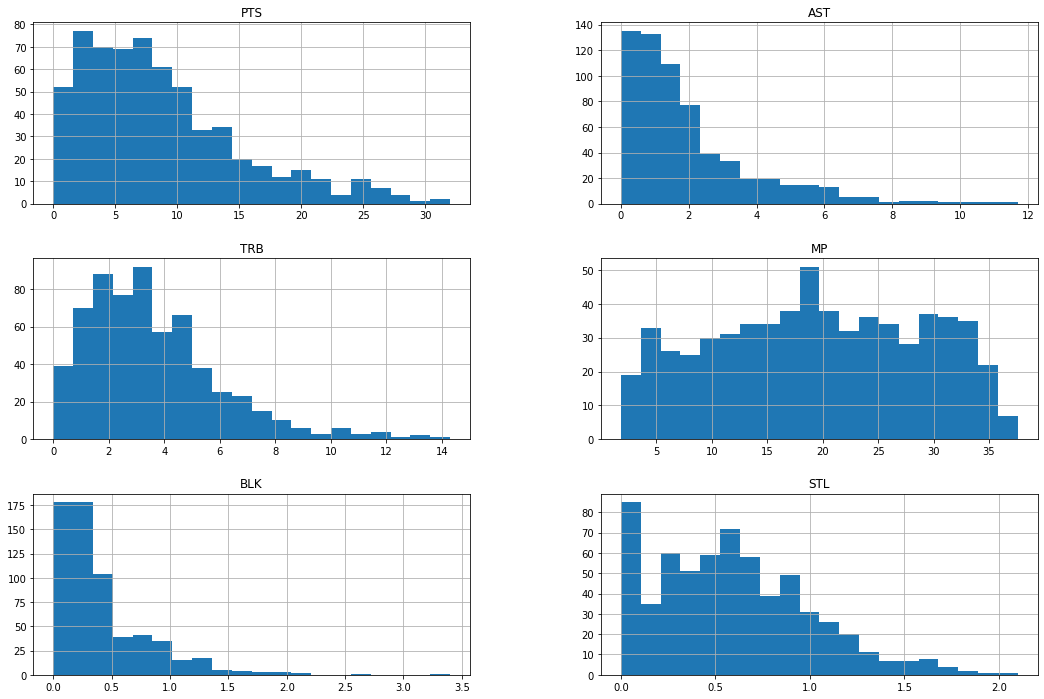

In [141]:
xG_Stats_1[['PTS', 'AST', 'TRB', 'MP', 'BLK', 'STL']].hist(bins=20, figsize=(18,12))

In [142]:
#giocatore con media punti/assist/rimbalzi/stoppate ecc più alta
a = xG_Stats_1['PTS'].max()
b = xG_Stats_1['AST'].max()
c = xG_Stats_1['TRB'].max()
d = xG_Stats_1['STL'].max()
e = xG_Stats_1['TOV'].max()
f = xG_Stats_1['BLK'].max()
[a,b,c,d,e,f]

[32.0, 11.7, 14.3, 2.1, 5.0, 3.4]

In [143]:
a = xG_Stats_1['PTS'].mean()
b = xG_Stats_1['AST'].mean()
c = xG_Stats_1['TRB'].mean()
d = xG_Stats_1['STL'].mean()
e = xG_Stats_1['TOV'].mean()
f = xG_Stats_1['BLK'].mean()
[a,b,c,d,e,f]

[8.71597444089457,
 1.9493610223642175,
 3.590255591054313,
 0.6124600638977635,
 1.0805111821086264,
 0.41597444089456864]

In [144]:
a = xG_Stats_1['PTS'].min()
b = xG_Stats_1['AST'].min()
c = xG_Stats_1['TRB'].min()
d = xG_Stats_1['STL'].min()
e = xG_Stats_1['TOV'].min()
f = xG_Stats_1['BLK'].min()
[a,b,c,d,e,f]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [145]:
#liste per variabili varie
PTS = list(xG_Stats_1['PTS'])

In [146]:
#xG_Stats_1[xG_Stats_1['PTS'].max()]

In [147]:
players_by_most_games = xG_Stats_1.sort_values(by='GS', ascending=False)[['Player', 'G', 'GS', 'PTS']]
players_by_most_games.set_index('Player', inplace=True)
players_by_most_games

,G,GS,PTS
Player,,,
RJ Barrett,72,72,17.6
Nikola Jokić,72,72,26.4
Mikal Bridges,72,72,13.5
Duncan Robinson,72,72,13.1
Bojan Bogdanović,72,72,17.0
...,...,...,...
Luke Kornet,13,0,2.0
John Konchar,43,0,4.3
Andre Roberson,5,0,1.2


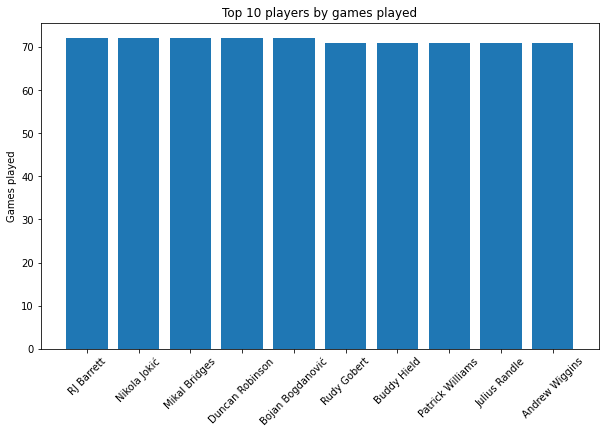

In [148]:
x = players_by_most_games[:10].index
y = players_by_most_games[:10]['GS']
plt.figure(figsize=(10,6))
plt.title('Top 10 players by games played')
plt.bar(x, y)
plt.ylabel('Games played')
plt.xticks(rotation=45)
plt.show()

In [149]:
players_by_most_games['GS']['Mikal Bridges']

72

In [150]:
players_by_most_points = xG_Stats_1.sort_values(by='PTS', ascending=False)[['Player', 'PTS', 'AST', 'TRB']]
players_by_most_points.set_index('Player', inplace=True)
players_by_most_points

,PTS,AST,TRB
Player,,,
Stephen Curry,32.0,5.8,5.5
Bradley Beal,31.3,4.4,4.7
Damian Lillard,28.8,7.5,4.2
Joel Embiid,28.5,2.8,10.6
Giannis Antetokounmpo,28.1,5.9,11.0
...,...,...,...
Anžejs Pasečņiks,0.0,1.0,1.0
Gary Clark,0.0,0.0,0.5
Noah Vonleh,0.0,0.3,0.3


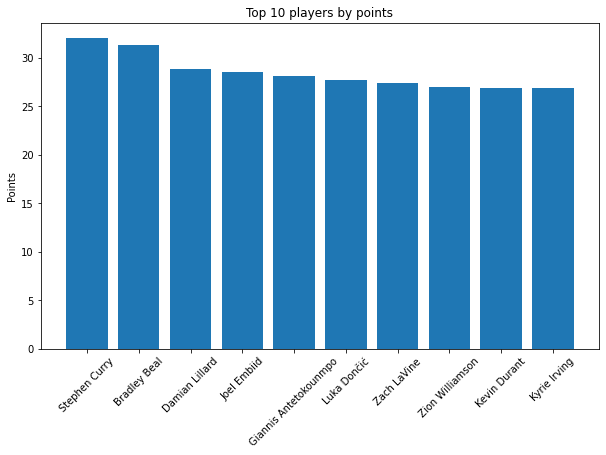

In [151]:
x = players_by_most_points[:10].index
y = players_by_most_points[:10]['PTS']
plt.figure(figsize=(10,6))
plt.title('Top 10 players by points')
plt.bar(x, y)
plt.ylabel('Points')
plt.xticks(rotation=45)
plt.show()

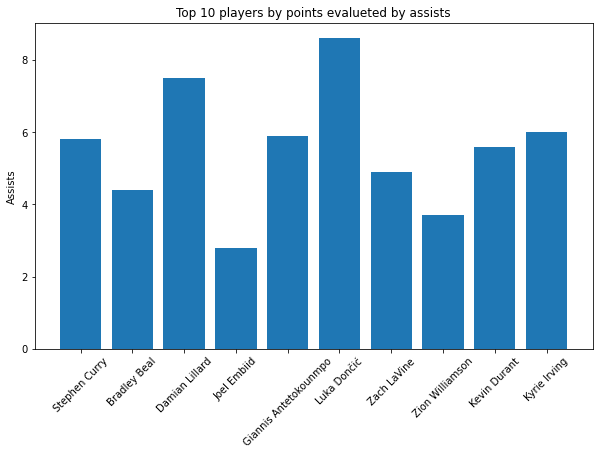

In [152]:
x = players_by_most_points[:10].index
y = players_by_most_points[:10]['AST']
plt.figure(figsize=(10,6))
plt.title('Top 10 players by points evalueted by assists')
plt.bar(x, y)
plt.ylabel('Assists')
plt.xticks(rotation=45)
plt.show()

In [153]:
a = players_by_most_points['PTS']['Stephen Curry']
b = players_by_most_points['PTS']['LeBron James']
c = players_by_most_points['PTS']['Nikola Jokić']
d = players_by_most_points['PTS']['Giannis Antetokounmpo']
e = players_by_most_points['PTS']['John Wall']
[a, b, c, d, e]

[32.0, 25.0, 26.4, 28.1, 20.6]

In [154]:
xG_players_groupby = xG_Stats_1.groupby('Player')

In [155]:
xG_players_groupby_sum = xG_players_groupby.sum()

In [156]:
a = xG_players_groupby_sum['PTS'].loc['LeBron James']
b = xG_players_groupby_sum['PTS'].loc['Stephen Curry']
[a, b]

[25.0, 32.0]

In [157]:
a = xG_players_groupby_sum['AST'].loc['LeBron James']
b = xG_players_groupby_sum['AST'].loc['Stephen Curry']
[a, b]

[7.8, 5.8]

## Predictive model

In [188]:
#models with adv stats and game stats

In [194]:
Adv_Stats_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 626 entries, 0 to 730
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  626 non-null    object 
 1   Pos     626 non-null    object 
 2   Age     626 non-null    float64
 3   Tm      626 non-null    object 
 4   G       626 non-null    float64
 5   MP      626 non-null    float64
 6   PER     626 non-null    float64
 7   TS%     626 non-null    float64
 8   3PAr    626 non-null    float64
 9   FTr     626 non-null    float64
 10  ORB%    626 non-null    float64
 11  DRB%    626 non-null    float64
 12  TRB%    626 non-null    float64
 13  AST%    626 non-null    float64
 14  STL%    626 non-null    float64
 15  BLK%    626 non-null    float64
 16  TOV%    626 non-null    float64
 17  USG%    626 non-null    float64
 18  OWS     626 non-null    float64
 19  DWS     626 non-null    float64
 20  WS      626 non-null    float64
 21  WS/48   626 non-null    float64
 22  OB

In [195]:
#predire le win share di alcuni giocatori
#predire l'andamento delle squadre nella stagione 2021-22 basandosi sui risultati dei 5 giocatori di ogni squadra e confrontare la classifica effettiva con quella predetta
#BPM e WS stagione 21/22 dei giocatori basandosi sui dati di adv_stats_1 con BPM, OBPM, DBPM, VORP, WS, WS/48, OWS, DWS

### BPM

In [220]:
dataa = Adv_Stats_1[['Player', 'BPM', 'G', 'VORP', 'WS', 'WS/48', 'PER', 'USG%', 'TS%']]
dataa.sort_values(by='Player')
x = dataa.drop(columns=['Player', 'BPM'])
y = dataa['BPM']

In [221]:
reg = LinearRegression(fit_intercept=False).fit(x,y)
print(reg.intercept_)
print(reg.coef_)
print(mean_squared_error(reg.predict(x),y))
print(reg.score(x,y))

0.0
[  0.04745922   2.41655218  -1.10463362  23.33344894   0.47560327
  -0.19039029 -12.44759891]
2.854249616960056
0.8888742429863692


In [239]:
reg.predict(X=[[70, 1.7, 3.4, 0.12, 13.8, 19.2, 0.472]])
#voglio mettere dei valori in input e vedere quanto dovrebbe essere BPM

C:\Users\T450s\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.50710859])

In [206]:
reg = Lasso(fit_intercept=False).fit(x,y)
print(reg.intercept_)
print(reg.coef_)
print(mean_squared_error(reg.predict(x),y))
print(reg.score(x,y))

0.0
[ 0.46533887  0.          0.          0.59104837 -0.48243993 -0.        ]
7.143718697522348
0.7218704546941141


In [207]:
reg = Ridge(fit_intercept=False).fit(x,y)
print(reg.intercept_)
print(reg.coef_)
print(mean_squared_error(reg.predict(x),y))
print(reg.score(x,y))

0.0
[ 1.64520523 -0.40901978  6.69467629  0.69053444 -0.31038794 -9.56808118]
3.4542688367866514
0.8655134305228209


In [210]:
reg = LassoCV(fit_intercept=False).fit(x,y)
print(reg.intercept_)
print(reg.coef_)
print(mean_squared_error(reg.predict(x),y))
print(reg.score(x,y))

0.0
[ 1.60035734 -0.3543101   0.          0.77765603 -0.37117635 -8.73937269]
3.6610014438022187
0.8574646189131081


In [211]:
reg = RidgeCV(fit_intercept=False).fit(x,y)
print(reg.intercept_)
print(reg.coef_)
print(mean_squared_error(reg.predict(x),y))
print(reg.score(x,y))

0.0
[  1.46381     -0.38262626  20.46819844   0.49567366  -0.19102918
 -10.89105989]
3.240243138214415
0.873846187277131


### WS

In [213]:
datab = Adv_Stats_1[['Player', 'BPM', 'G', 'VORP', 'WS', 'WS/48', 'PER', 'USG%', 'TS%']]
datab.sort_values(by='Player')
x_ = datab.drop(columns=['Player', 'WS'])
y_ = datab['WS']

In [214]:
reg = LinearRegression(fit_intercept=False).fit(x_,y_)
print(reg.intercept_)
print(reg.coef_)
print(mean_squared_error(reg.predict(x_),y_))
print(reg.score(x_,y_))

0.0
[-0.12725009  0.03677775  1.69255178  1.59007273  0.09576824 -0.06212684
 -1.30624683]
0.32879999314804564
0.9317799979424832


In [215]:
reg = Lasso(fit_intercept=False).fit(x_,y_)
print(reg.intercept_)
print(reg.coef_)
print(mean_squared_error(reg.predict(x_),y_))
print(reg.score(x_,y_))

0.0
[ 0.08502152  0.04759512  0.23105951  0.          0.01105462  0.
 -0.        ]
1.675059151235529
0.6524557751669485


In [216]:
reg = LassoCV(fit_intercept=False).fit(x_,y_)
print(reg.intercept_)
print(reg.coef_)
print(mean_squared_error(reg.predict(x_),y_))
print(reg.score(x_,y_))

0.0
[-0.02222052  0.03638311  1.50505553  0.          0.03647899 -0.03773788
 -0.        ]
0.37711665866871746
0.9217551710266613


In [217]:
reg = Ridge(fit_intercept=False).fit(x_,y_)
print(reg.intercept_)
print(reg.coef_)
print(mean_squared_error(reg.predict(x_),y_))
print(reg.score(x_,y_))

0.0
[-0.11626784  0.03655413  1.69494046  0.33058503  0.10442913 -0.06948103
 -1.03732224]
0.3299040669501007
0.9315509227642063


In [219]:
reg = RidgeCV(fit_intercept=False).fit(x_,y_)
print(reg.intercept_)
print(reg.coef_)
print(mean_squared_error(reg.predict(x_),y_))
print(reg.score(x_,y_))

0.0
[-0.11626784  0.03655413  1.69494046  0.33058503  0.10442913 -0.06948103
 -1.03732224]
0.3299040669500976
0.9315509227642069
